# Etude sur les colonnes du dataset Caractéristiques

# Sommaire

1. [Lecture du dataset final](#1.-Lecture-du-dataset-final)
    1. [Lecture des fichiers](#A.-Lecture-des-fichiers)
    2. [Fusion des datasets par années](#B.-Fusion-des-datasets-par-années)
2. [Gestion des doublons](#2.-Gestion-des-doublons)
3. [Création du sous dataset dfc](#3.-Création-du-sous-dataset-dfc)
4. [Données manquantes](#4.-Données-manquantes)
5. [Revue des colonnes](#5.-revue-des-colonnes)
    1. [Colonne jour, mois, an et création de la colonne date et week end](#A.-Colonne-jour,-mois,-an-et-création-de-la-colonne-date-et-week-end)
        2. [Colonne jour](#b.-Colonne-jour)
        3. [Colonne mois](#c.-Colonne-mois)
        4. [Colonne an : année](#d.-Colonne-an-:-année)
        5. [Création de la colonne date](#e.-Création-de-la-colonne-date)
        6. [Création de la colonne week-end et de la colonne weekday](#f.-Création-de-la-colonne-week-day-et-de-la-colonne-week-end)
        7. [recap diagramme date](#g.-recap-diagramme-date)
    2. [Colonne hrmn et création de la colonne heure et période de la journée](#B.-Colonne-hrmn-et-création-de-la-colonne-heure-et-période-de-la-journée)
    3. [Lieu des accidents](#C.-Lieu-des-accidents)
        1. [Colonne GPS](#a.-Colonne-GPS)
        2. [Colonne adresse](#b.-Colonne-adr-:-adresse)
        3. [Colonne dep : département](#c.-Colonne-dep-:-département)
        4. [Colonne com : commune](#d.-Colonne-com-:-commune)
        5. [Colonnes lat et long](#e.-Colonnes-lat-et-long)
        6. [Colonne agg : Agglomération](#f.-Colonne-agg-:-Agglomération)
        7. [Colonne int : Intersection](#g.-Colonne-int-:-Intersection)    
    4. [Autres variables](#E.-Autres-variables)
        1. [Colonne lum : lumière](#a.-Colonne-lum-:-lumière)
        2. [Colonne atm : conditions atmosphèriques](#b.-Colonne-atm-:-conditions-atmosphèriques)
        3. [Colonne Col : type de collision](#c.-Colonne-col-:-type-de-collision)
6. [Données manquantes](#6.-Données-manquantes)
7. [Recap test chi2](#7.-Recap-test-chi2)
8. [Recap test V Cramer](#8.-Recap-test-V-Cramer)


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from bokeh.plotting import figure
from bokeh.io import  push_notebook,output_notebook, show
from bokeh.models.widgets import Panel, Tabs
# from bokeh.models.layouts import TabPanel, Tabs
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.io import curdoc
import matplotlib.ticker as mtick
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

## 1. Lecture du dataset final


In [41]:
pip list

Note: you may need to restart the kernel to use updated packages.Package                      Version
---------------------------- -----------
3                            0.0.0
absl-py                      1.4.0
altair                       5.0.1
ansi2html                    1.8.0
anyio                        3.7.0
appdirs                      1.4.4
apptools                     5.2.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        23.1.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
blinker                      1.6.2
bokeh                        2.4.3
cachetools                   5.3.1
certifi                      2023.5.7
cffi                         1.15.1
charset-normalizer           3.1.0
click                        8.1.3
click-plugins                1.1.1
cligj    


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
df_total = pd.read_csv('../data/datasetf.csv', sep ='\t')

In [43]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497594 entries, 0 to 497593
Data columns (total 57 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      497594 non-null  int64  
 1   an           497594 non-null  int64  
 2   mois         497594 non-null  int64  
 3   jour         497594 non-null  int64  
 4   hrmn         497594 non-null  object 
 5   lum          497594 non-null  int64  
 6   agg          497594 non-null  int64  
 7   int          497594 non-null  int64  
 8   atm          497585 non-null  float64
 9   col          497586 non-null  float64
 10  com          497594 non-null  object 
 11  adr          493123 non-null  object 
 12  gps          130066 non-null  object 
 13  lat          493476 non-null  object 
 14  long         493476 non-null  object 
 15  dep          497594 non-null  object 
 16  catr         497594 non-null  int64  
 17  voie         413492 non-null  object 
 18  v1           343182 non-

## 2. Gestion des doublons

In [7]:
# Affiche le nombre de doublons
# print("Nombre de doublons :", df_total.duplicated().sum())
# doublons = df_total.duplicated(keep=False)
# doublons_index = df_total.index[doublons]
# print(doublons_index)
# doublons = df_total.loc[doublons_index]
#print(doublons)

In [8]:
#Suppression des doublons
# df_total = df_total.drop_duplicates()

## 3. Création du sous dataset dfc
comprend les colonnes des fichiers caractéristiques + la variable target "grav"

### A. Description des variables

La rubrique CARACTERISTIQUES

Num_Acc

Numéro d'identifiant de l’accident.

jour mois

Jour de l'accident.

Mois de l'accident.

an

Année de l'accident.

hrmn

Heure et minutes de l'accident.

lum (Lumière) : conditions d’éclairage dans lesquelles l'accident s'est produit :
1 – Plein jour
2 – Crépuscule ou aube
3 – Nuit sans éclairage public
4 – Nuit avec éclairage public non allumé
5 – Nuit avec éclairage public allumé

dep (Département) : Code INSEE (Institut National de la Statistique et des Etudes Economiques) du
département (2A Corse-du-Sud – 2B Haute-Corse).

com (Commune) : Le numéro de commune est un code donné par l‘INSEE. Le code est composé du code
INSEE du département suivi par 3 chiffres.

agg (Localisation):
1 – Hors agglomération
2 – En agglomération

int (Intersection) :
1 – Hors intersection
2 – Intersection en X
3 – Intersection en T
4 – Intersection en Y
5 – Intersection à plus de 4 branches
6 – Giratoire
7 – Place
8 – Passage à niveau
9 – Autre intersection

atm (Conditions atmosphériques) :
-1 – Non renseigné
1 – Normale
2 – Pluie légère
3 – Pluie forte
4 – Neige - grêle
5 – Brouillard - fumée
6 – Vent fort - tempête
7 – Temps éblouissant
8 – Temps couvert
9 – Autre

col (Type de collision) :
-1 – Non renseigné
1 – Deux véhicules - frontale
2 – Deux véhicules – par l’arrière
3 – Deux véhicules – par le coté
4 – Trois véhicules et plus – en chaîne
5 – Trois véhicules et plus - collisions multiples
6 – Autre collision
7 – Sans collision

adr (Adresse postale) : variable renseignée pour les accidents survenus en agglomération.

lat (Latitude)

Long (Longitude)

Sous datasets "Caractéristiques" + target

### B. Code

In [44]:
dfc = df_total.iloc[:,0:16]
dfc = pd.concat([dfc, df_total.iloc[:, 43]], axis=1)

In [45]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497594 entries, 0 to 497593
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  497594 non-null  int64  
 1   an       497594 non-null  int64  
 2   mois     497594 non-null  int64  
 3   jour     497594 non-null  int64  
 4   hrmn     497594 non-null  object 
 5   lum      497594 non-null  int64  
 6   agg      497594 non-null  int64  
 7   int      497594 non-null  int64  
 8   atm      497585 non-null  float64
 9   col      497586 non-null  float64
 10  com      497594 non-null  object 
 11  adr      493123 non-null  object 
 12  gps      130066 non-null  object 
 13  lat      493476 non-null  object 
 14  long     493476 non-null  object 
 15  dep      497594 non-null  object 
 16  grav     497594 non-null  int64  
dtypes: float64(2), int64(8), object(7)
memory usage: 64.5+ MB


In [46]:
dfc.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,grav
0,201800000001,18,1,24,1505,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590,3
1,201800000001,18,1,24,1505,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590,1
2,201800000002,18,2,12,1015,1,2,7,7.0,7.0,11,Place du général de Gaul,M,5052936.0,293151.0,590,1
3,201800000002,18,2,12,1015,1,2,7,7.0,7.0,11,Place du général de Gaul,M,5052936.0,293151.0,590,4
4,201800000003,18,3,4,1135,1,2,3,1.0,7.0,477,Rue nationale,M,5051243.0,291714.0,590,3


## 4. Données manquantes

fonction présentant es colonnes par pourcentage de données manquantes

In [47]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [48]:
percent_missing(dfc)

col      0.001608
atm      0.001809
lat      0.827582
long     0.827582
adr      0.898524
gps     73.861019
dtype: float64

Excepté la colonnne GPS très peu de données manquantes - nous proposerons des décisions de gestion de ces valeurs lors de notre revue des colonnes

Changement du -1 en Nan de la  colonne gravité

In [49]:
dfc['grav'] = dfc['grav'].replace(-1, np.nan)

## 5. revue des colonnes

### A. Colonne jour, mois, an et création de la colonne date et week-end

#### b. Colonne jour

In [50]:
dfc['jour'].value_counts(normalize=True)

jour
6     0.034207
12    0.034066
13    0.033975
16    0.033867
18    0.033831
19    0.033391
20    0.033340
7     0.033274
15    0.033266
9     0.033204
17    0.033133
11    0.033021
22    0.032941
5     0.032912
10    0.032826
8     0.032637
14    0.032583
23    0.032504
4     0.032442
2     0.032422
24    0.032299
25    0.032289
27    0.032235
21    0.032185
28    0.032094
26    0.032038
1     0.031843
3     0.031787
29    0.030627
30    0.030193
31    0.018565
Name: proportion, dtype: float64

Rapport entre le jour du mois et la gravité de l'accident

In [51]:
gravite_par_jour_normalisee = pd.crosstab(dfc['jour'], dfc['grav'], normalize='index')
gravite_par_jour_normalisee
gravite_par_jour_normalisee_trie = gravite_par_jour_normalisee.sort_values(by=2, ascending=False)
gravite_par_jour_normalisee_trie
# le nombre de tué (valeur = 2) varie entre 0.027 et 0.030 -> pas de lien entre le jour et le nombre de tué

grav,1.0,2.0,3.0,4.0
jour,,,,
1,0.409177,0.030674,0.157915,0.402234
14,0.412893,0.028748,0.164343,0.394016
19,0.425811,0.028050,0.158551,0.387588
16,0.419204,0.027713,0.158092,0.394991
7,0.420547,0.027541,0.156671,0.395241
20,0.413758,0.027371,0.161934,0.396937
18,0.422044,0.026500,0.155199,0.396257
10,0.418677,0.026454,0.156338,0.398530
27,0.421099,0.026311,0.157990,0.394601


Ok tous les jours sont présents

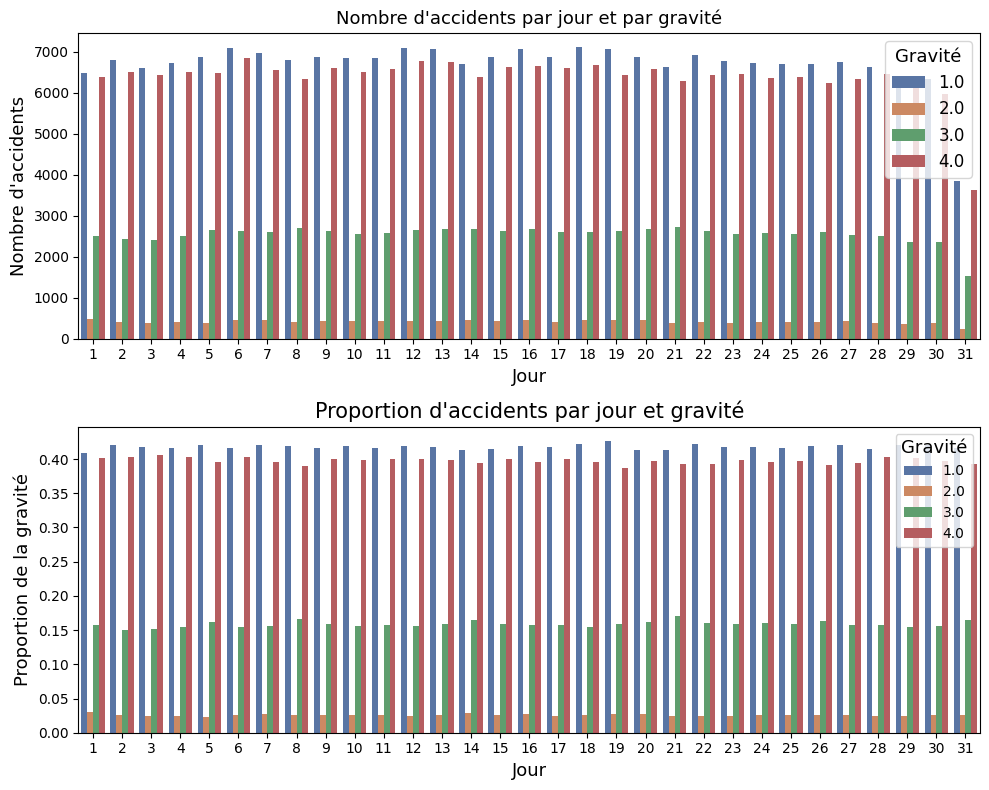

In [52]:
# Configuration de la figure
plt.figure(figsize=(10, 8))

# Premier graphique : Nombre d'accidents par jour et par gravité
plt.subplot(2, 1, 1)
sns.countplot(data=dfc, x='jour', hue='grav')
plt.title("Nombre d'accidents par jour et par gravité", fontsize=13)
plt.xlabel("Jour", fontsize=13)
plt.ylabel("Nombre d'accidents", fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right', fontsize='12')

# Calcul des proportions
proportions = dfc.groupby('jour')['grav'].value_counts(normalize=True).reset_index(name='proportion')

# Deuxième graphique : Proportion d'accidents par jour et gravité
plt.subplot(2, 1, 2)
sns.barplot(x='jour', y='proportion', hue='grav', data=proportions)
plt.title('Proportion d\'accidents par jour et gravité', fontsize=15)
plt.xlabel('Jour', fontsize=13)
plt.ylabel('Proportion de la gravité', fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right')

plt.tight_layout()
plt.show()


ok les 31 jours sont présents. Egalement répartis sauf le 31 ce qui est normal puisque 5 mois n'ont pas 31 jours.

Etude sur l'indépdande de la variable jour et de la variable Grav : test du Khi2 entre variable grav et variable jour

In [53]:
# H0 : hypothèse nulle : indépendance de la gravité par rapport au jour

from scipy.stats import chi2_contingency, chi2

table_de_contingence = pd.crosstab(dfc['jour'], dfc['grav'])

stat, p_value, dl, expected_freq = chi2_contingency(table_de_contingence)
#print("degré de liberté : 4*30 = 120")
print("Degré de liberté : ", dl)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dl)
print("Valeur critique :", critical_value)
print("P-value:", p_value)

Degré de liberté :  90
Valeur critique : 113.1452701425554
P-value: 0.004622196324480681


H0 rejeté donc H1 validé -> dépendance entre le mois et la gravité

#### c. Colonne mois

In [54]:
dfc['mois'].value_counts(normalize=True)*100

mois
9     9.865674
7     9.852812
10    9.744089
6     9.645816
8     8.452674
12    8.434788
5     8.086311
11    7.877908
1     7.724571
3     6.967930
2     6.937383
4     6.410045
Name: proportion, dtype: float64

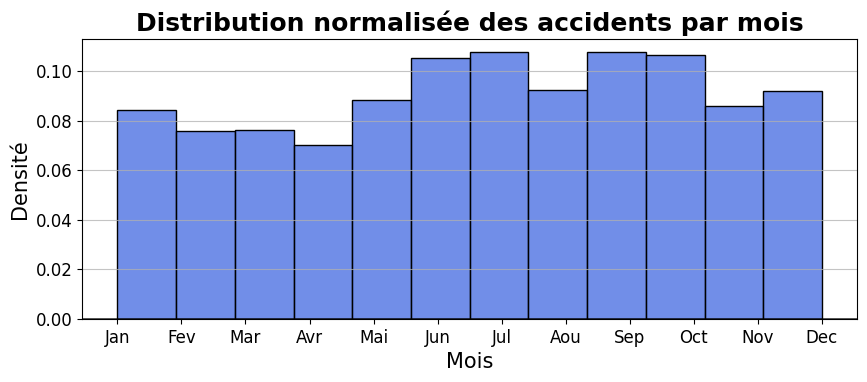

In [55]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1) 
sns.histplot(data=dfc, x='mois', stat='density', bins=12, color='royalblue', edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.title("Distribution normalisée des accidents par mois", fontsize=18, fontweight='bold')
plt.xlabel("Mois", fontsize=15)
plt.ylabel("Densité", fontsize=15)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(0, color='black', linewidth=1.3, alpha=0.7)
plt.show()


Rapport entre le mois et la gravité de l'accident

In [56]:
gravite_par_mois_normalisee = pd.crosstab(dfc['mois'], dfc['grav'], normalize='index')
gravite_par_mois_normalisee
# Le nombre de tué varie entre 0.0229 et 0.0279 'mois de décembre'

grav,1.0,2.0,3.0,4.0
mois,,,,
1,0.422803,0.025550,0.149347,0.402300
2,0.423832,0.026683,0.155841,0.393644
3,0.416361,0.026221,0.156922,0.400496
4,0.413262,0.027622,0.164947,0.394168
5,0.412765,0.024779,0.167462,0.394995
6,0.418391,0.024046,0.165260,0.392303
7,0.408152,0.027845,0.170539,0.393464
8,0.410676,0.026418,0.181548,0.381358
9,0.421359,0.025568,0.155489,0.397584


Graphique sur le nombre d'accident par mois et par an

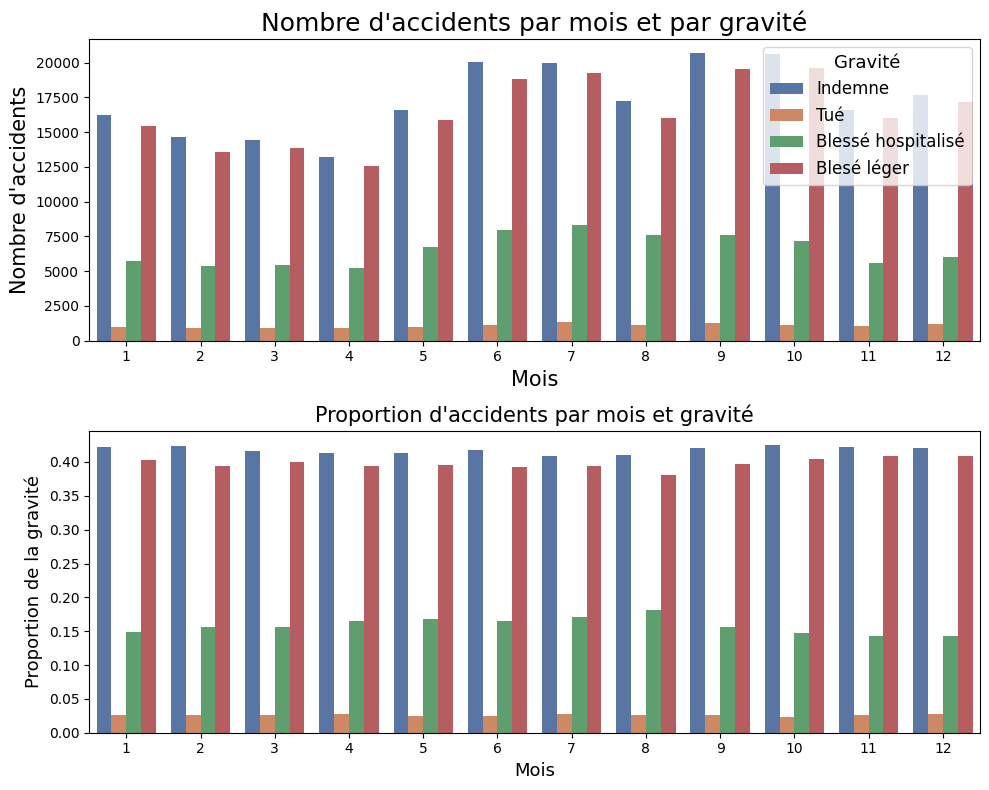

In [57]:
# Configuration de la figure
plt.figure(figsize=(10, 8))

# Premier graphique : Nombre d'accidents par mois et par gravité
plt.subplot(2, 1, 1)  # 1 row, 2 cols, subplot 1
sns.countplot(data=dfc, x='mois', hue='grav')
plt.title("Nombre d'accidents par mois et par gravité", fontsize=18)
plt.xlabel("Mois", fontsize=15)
plt.ylabel("Nombre d'accidents", fontsize=15)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right',fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])
# Calcul des proportions
proportions = dfc.groupby('mois')['grav'].value_counts(normalize=True).reset_index(name='proportion')

# Deuxième graphique : Proportion d'accidents par mois et gravité
plt.subplot(2, 1, 2)
sns.barplot(x='mois', y='proportion', hue='grav', data=proportions)
plt.title('Proportion d\'accidents par mois et gravité', fontsize=15)
plt.xlabel('Mois', fontsize=13)
plt.ylabel('Proportion de la gravité', fontsize=13)
#plt.legend(title='Gravité', title_fontsize='13', loc='upper right', fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])
plt.legend().remove()
plt.tight_layout()
plt.show()


##### Ok les 12 mois sont présents avec une distribution inégale. 
##### Plus d'accident dans la période de juin à octobre.
##### Année 2020 de mars à mai et novembre décembre beaucoup moins d'accident. en effet période Covid

In [58]:
# H0 : hypothèse nulle : indépendance de la gravité par rapport au mois

from scipy.stats import chi2_contingency, chi2

table_de_contingence = pd.crosstab(dfc['mois'], dfc['grav'])

stat, p_value, dl, expected_freq = chi2_contingency(table_de_contingence)
#print("degré de liberté : 4*30 = 120")
print("Degré de liberté :",dl)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dl)
print("Valeur critique :", critical_value)
print("P-value:", p_value)

Degré de liberté : 33
Valeur critique : 47.39988391908093
P-value: 4.779413462268449e-97


rejet de l'hypothèse nulle -> dépendance entre le mois et la gravité

#### d. Colonne an : année

Etude sur l'indépdande de la variable mois et de la variable Grav : test du Khi2 entre variable grav et la variable mois

In [59]:
dfc['an'].unique()

array([  18, 2019, 2020, 2021], dtype=int64)

transformation de l'année 18 en 2018

transformation de l'année 18 en 2018

In [60]:
dfc['an'] = dfc['an'].apply(lambda x: 2018 if x == 18 else x)

Etude sur la distribution

In [61]:
dfc['an'].value_counts(normalize=True)*100

an
2019    26.723996
2018    26.159680
2021    25.955498
2020    21.160826
Name: proportion, dtype: float64

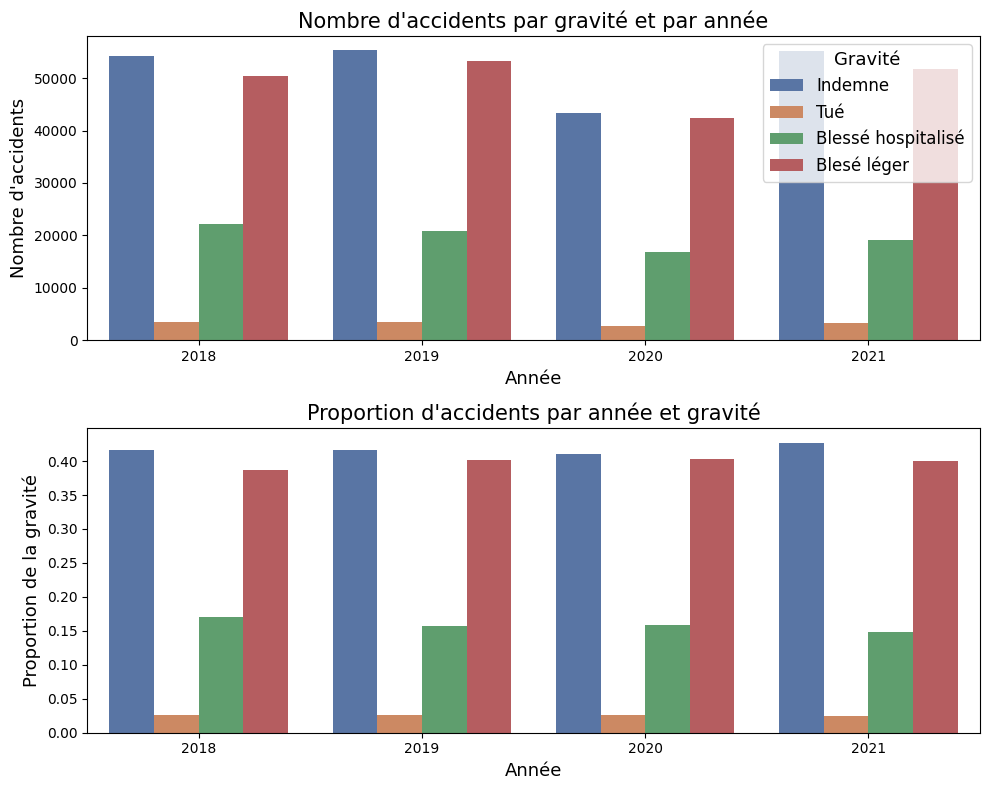

In [62]:
# Configuration de la figure
plt.figure(figsize=(10, 8))

# Premier graphique : Nombre d'accidents par année et par gravité
plt.subplot(2, 1, 1)
sns.countplot(data=dfc, x='an', hue='grav')
plt.title("Nombre d'accidents par gravité et par année", fontsize=15)
plt.xlabel("Année", fontsize=13)
plt.ylabel("Nombre d'accidents", fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right',fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])


# Calcul des proportions
proportions = dfc.groupby('an')['grav'].value_counts(normalize=True).reset_index(name='proportion')

# Deuxième graphique : Proportion d'accidents par année et gravité
plt.subplot(2, 1, 2)
sns.barplot(x='an', y='proportion', hue='grav', data=proportions)
plt.title('Proportion d\'accidents par année et gravité', fontsize=15)
plt.xlabel('Année', fontsize=13)
plt.ylabel('Proportion de la gravité', fontsize=13)
plt.legend().remove()
#plt.legend(title='Gravité', title_fontsize='13', loc='upper right')

plt.tight_layout()
plt.show()


  Nombre d'accident a peu près semblable d'une année sur l'autre sauf pour l'année 2020 cause covid

Rapport entre l'année et la gravité de l'accident

In [63]:
gravite_par_mois_normalisee = pd.crosstab(dfc['an'], dfc['grav'], normalize='index')
gravite_par_mois_normalisee
# Le nombre de tué varie entre 0.0249 et 0.0264 '2020'

grav,1.0,2.0,3.0,4.0
an,,,,
2018,0.416751,0.026058,0.170309,0.386882
2019,0.415967,0.026305,0.156854,0.400874
2020,0.410912,0.026402,0.159314,0.403371
2021,0.426886,0.024936,0.147839,0.400339


Etude sur l'indépdande de la variable mois et de la variable Grav : test du Khi2 entre variable grav et la variable année

In [64]:
# H0 : hypothèse nulle : indépendance de la gravité par rapport à l'année

from scipy.stats import chi2_contingency, chi2

table_de_contingence = pd.crosstab(dfc['an'], dfc['grav'])

stat, p_value, dl, expected_freq = chi2_contingency(table_de_contingence)
#print("degré de liberté : 4*30 = 120")
print("degré de liberté : ",dl)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dl)
print("valeur stat :", stat)
print("Valeur critique :", critical_value)
print("P-value:", p_value)

degré de liberté :  9
valeur stat : 307.6543330557257
Valeur critique : 16.918977604620448
P-value: 6.2031317737796306e-61


On rejette l'hypothèse nulle. dépendance entre les deux variables

#### e. Création de la colonne date

In [65]:
# Concaténation les colonnes 'an', 'mois' et 'jour' en une seule chaîne
dfc['date'] = dfc['an'].astype(str) + '-' + dfc['mois'].astype(str) + '-' + dfc['jour'].astype(str)

# Conversion la colonne 'date' en dates à l'aide de pd.to_datetime()
dfc['date'] = pd.to_datetime(dfc['date'], format='%Y-%m-%d')

In [66]:
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.layouts import gridplot, layout
from bokeh.models.widgets import Tabs, Panel
from bokeh.io import curdoc


values = dfc['date'].value_counts().sort_index()
data = pd.DataFrame({'date': values.index, 'values': values})


panels = []


for year in data['date'].dt.year.unique():
    
# Filtrage des données pour l'année en cours
    data_year = data[data['date'].dt.year == year]
    data_year = data_year.drop(columns=['date'])
    source = ColumnDataSource(data_year)
    
    p = figure(title=f"Nombre d'accident par jour en {year}",
               x_axis_label="Date",
               y_axis_label="Nombre d'accidents",
               x_axis_type='datetime',
               width=900,
               height=400)
    
    p.line(x="date",
           y="values",
           source=source,
           line_width=2)
    
    circles = p.circle(x="date",
                       y="values",
                       source=source,
                       size=8,
                       fill_color="white",
                       line_color="blue")
    
    hover = HoverTool(tooltips=[("Date", "@date{%F}"),
                                ("Nombre d'accidents", "@values")],
                      formatters={"@date": "datetime"},
                      mode='vline')
    
    p.add_tools(hover)
    curdoc().theme = 'night_sky'
    
# Création d'un Panel pour cette année et ajout à la liste des panels
    panel = Panel(child=p, title=str(year))
    panels.append(panel)

# Création des onglets à partir des panels
tabs = Tabs(tabs=panels)

output_notebook()
show(tabs)


Loading BokehJS ...

#### f. Création de la colonne week day et de la colonne week end

In [67]:
# Jour de la semaine
dfc["weekday"] = dfc['date'].dt.day_name(locale='French')

In [68]:
dfc['weekday'].value_counts(normalize=True)*100
# lundi = 0, mardi =1, mercredi=2, jeudi=3, vendredi=4, samedi=5, dimanche=6

weekday
Vendredi    16.689108
Jeudi       14.566896
Samedi      14.547000
Mardi       14.321515
Mercredi    14.224247
Lundi       13.307837
Dimanche    12.343396
Name: proportion, dtype: float64

In [69]:
gravite_par_jour_de_la_semaine_normalisee = pd.crosstab(dfc['weekday'], dfc['grav'], normalize='index')
gravite_par_jour_de_la_semaine_normalisee
# Le nombre de tué varie entre 0.02228 et 0.03230 'dimanche' -> il semble il avoir plus de tué le week end

grav,1.0,2.0,3.0,4.0
weekday,,,,
Dimanche,0.378275,0.032306,0.192907,0.396512
Jeudi,0.427978,0.023731,0.149839,0.398452
Lundi,0.425857,0.024120,0.146685,0.403338
Mardi,0.430528,0.022231,0.144810,0.402431
Mercredi,0.427584,0.023738,0.148237,0.400441
Samedi,0.402669,0.030631,0.176050,0.390649
Vendredi,0.426462,0.025376,0.155567,0.392596


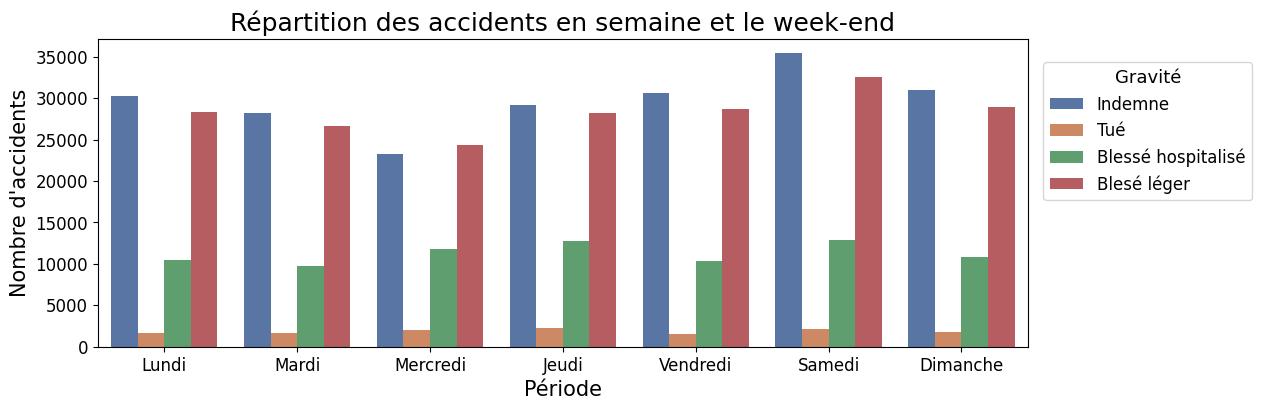

In [70]:
fig = plt.figure(figsize=(12, 4), dpi=100)
ax = sns.countplot(data=dfc, x='weekday', hue='grav')

plt.title("Répartition des accidents en semaine et le week-end", fontsize=18)
plt.xlabel("Période", fontsize=15)
plt.ylabel("Nombre d'accidents", fontsize=15)
ax.set_xticks([0, 1,2,3,4,5,6])
ax.set_xticklabels(['Lundi', 'Mardi','Mercredi', 'Jeudi','Vendredi', 'Samedi', 'Dimanche'], fontsize=12)
ax.tick_params(axis='both', labelsize=12)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right',bbox_to_anchor=(1.25, 0.95), fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])

plt.show()

In [71]:
import holidays
date_counts = dfc.date.value_counts().head(20)
fr_holidays = holidays.France()


for date in date_counts.index:
    day_name = dfc[dfc.date == date].weekday.iloc[0]
    is_holiday = date in fr_holidays
    print(f"La date {date} correspond au jour {day_name}. Jour férié : {'Oui' if is_holiday else 'Non'}")

La date 2021-06-11 00:00:00 correspond au jour Vendredi. Jour férié : Non
La date 2021-10-09 00:00:00 correspond au jour Samedi. Jour férié : Non
La date 2018-12-21 00:00:00 correspond au jour Vendredi. Jour férié : Non
La date 2021-10-22 00:00:00 correspond au jour Vendredi. Jour férié : Non
La date 2018-10-05 00:00:00 correspond au jour Vendredi. Jour férié : Non
La date 2018-04-06 00:00:00 correspond au jour Vendredi. Jour férié : Non
La date 2019-06-21 00:00:00 correspond au jour Vendredi. Jour férié : Non
La date 2018-05-18 00:00:00 correspond au jour Vendredi. Jour férié : Non
La date 2019-12-20 00:00:00 correspond au jour Vendredi. Jour férié : Non
La date 2021-06-09 00:00:00 correspond au jour Mercredi. Jour férié : Non
La date 2021-06-16 00:00:00 correspond au jour Mercredi. Jour férié : Non
La date 2018-06-22 00:00:00 correspond au jour Vendredi. Jour férié : Non
La date 2021-10-16 00:00:00 correspond au jour Samedi. Jour férié : Non
La date 2019-06-28 00:00:00 correspond au 

Distribution équilibrée

graphique

Weekend

In [72]:
# Weekend
dfc["weekend"] = np.where(dfc["weekday"].isin(['Samedi', 'Dimanche']), 1, 0)

In [73]:
dfc.weekend.value_counts(normalize=True)

weekend
0    0.731096
1    0.268904
Name: proportion, dtype: float64

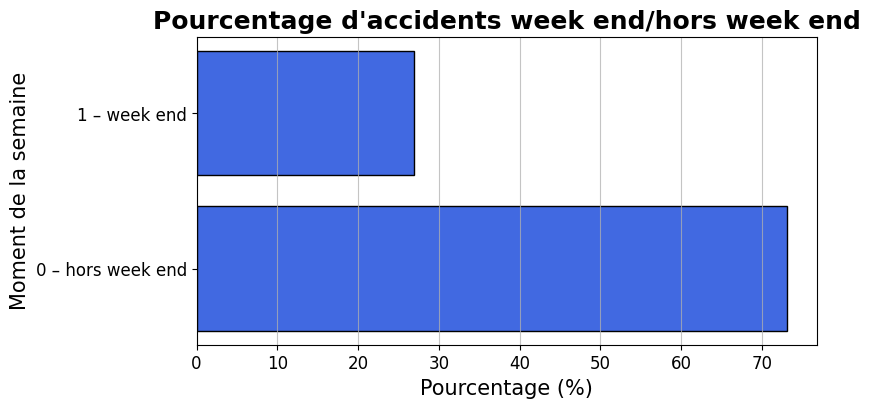

In [74]:
week_percentages = dfc['weekend'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 4))
plt.barh(week_percentages.index, week_percentages.values, color='royalblue', edgecolor='black')
plt.grid(axis='x', alpha=0.75)
plt.title("Pourcentage d'accidents week end/hors week end", fontsize=18, fontweight='bold')
plt.xlabel("Pourcentage (%)", fontsize=15)
plt.ylabel("Moment de la semaine", fontsize=15)
labels = ['0 – hors week end', '1 – week end']
plt.yticks(ticks=week_percentages.index, labels=labels, fontsize=12)
plt.xticks(fontsize=12)
plt.axvline(0, color='black', linewidth=1.3, alpha=0.7)
plt.show()

In [75]:
gravite_par_weekend_normalisee = pd.crosstab(dfc['weekend'], dfc['grav'], normalize='index')
gravite_par_weekend_normalisee
# Le nombre de tué varie entre 0.023882 et 0.031396 le wwek end

grav,1.0,2.0,3.0,4.0
weekend,,,,
0,0.427669,0.023885,0.149275,0.399171
1,0.391472,0.031400,0.183788,0.393340


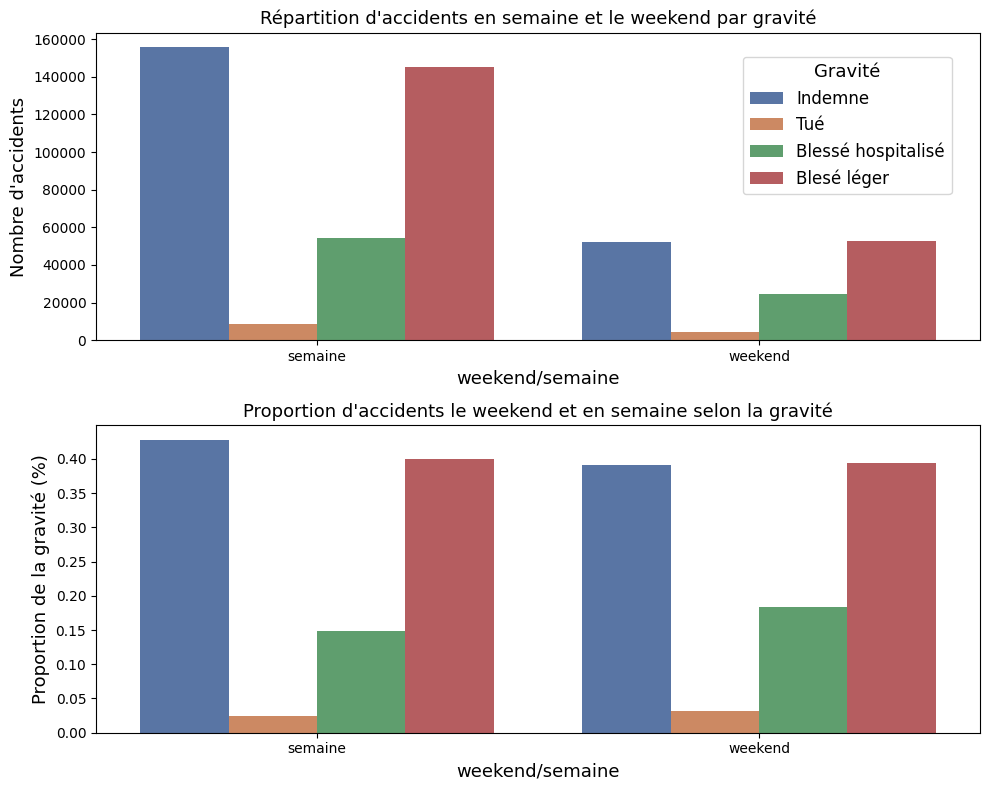

In [76]:
sns.set_palette("deep")

# Configuration de la figure
plt.figure(figsize=(10, 8))

# Premier graphique : Nombre d'accidents en fonction du type d'intersection par gravité
plt.subplot(2, 1, 1)
sns.countplot(data=dfc, x='weekend', hue='grav')
plt.title("Répartition d'accidents en semaine et le weekend par gravité", fontsize=13)
plt.xlabel("weekend/semaine", fontsize=13)
plt.ylabel("Nombre d'accidents", fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right')
labels = ['semaine', 'weekend']
plt.xticks(ticks=range(2), labels=labels)
plt.legend(title='Gravité', title_fontsize='13', bbox_to_anchor=(0.85, 0.95), loc='upper center', fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])

# Calcul des proportions
proportions = dfc.groupby('weekend')['grav'].value_counts(normalize=True).reset_index(name='proportion')

# Deuxième graphique : Proportion d'accidents par type d'intersection et gravité
plt.subplot(2, 1, 2)
sns.barplot(x='weekend', y='proportion', hue='grav', data=proportions)
plt.title("Proportion d\'accidents le weekend et en semaine selon la gravité", fontsize=13)
plt.xlabel("weekend/semaine", fontsize=13)
plt.ylabel('Proportion de la gravité (%)', fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right')
labels = ['semaine', 'weekend']
plt.xticks(ticks=range(2), labels=labels)
plt.legend().remove()

plt.tight_layout()
plt.show()

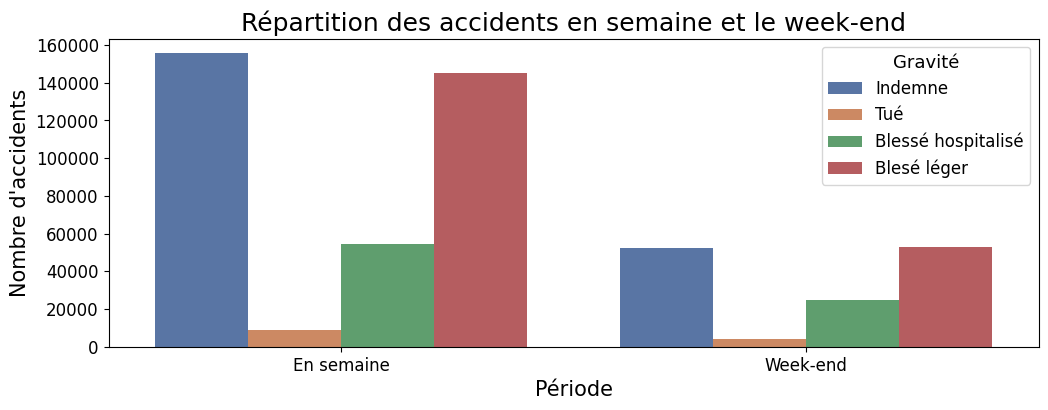

In [77]:
fig = plt.figure(figsize=(12, 4), dpi=100)
ax = sns.countplot(data=dfc, x='weekend', hue='grav')

plt.title("Répartition des accidents en semaine et le week-end", fontsize=18)
plt.xlabel("Période", fontsize=15)
plt.ylabel("Nombre d'accidents", fontsize=15)
ax.set_xticks([0, 1])
ax.set_xticklabels(['En semaine', 'Week-end'], fontsize=12)
ax.tick_params(axis='both', labelsize=12)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right', fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])

plt.show()


#### g. recap diagramme date

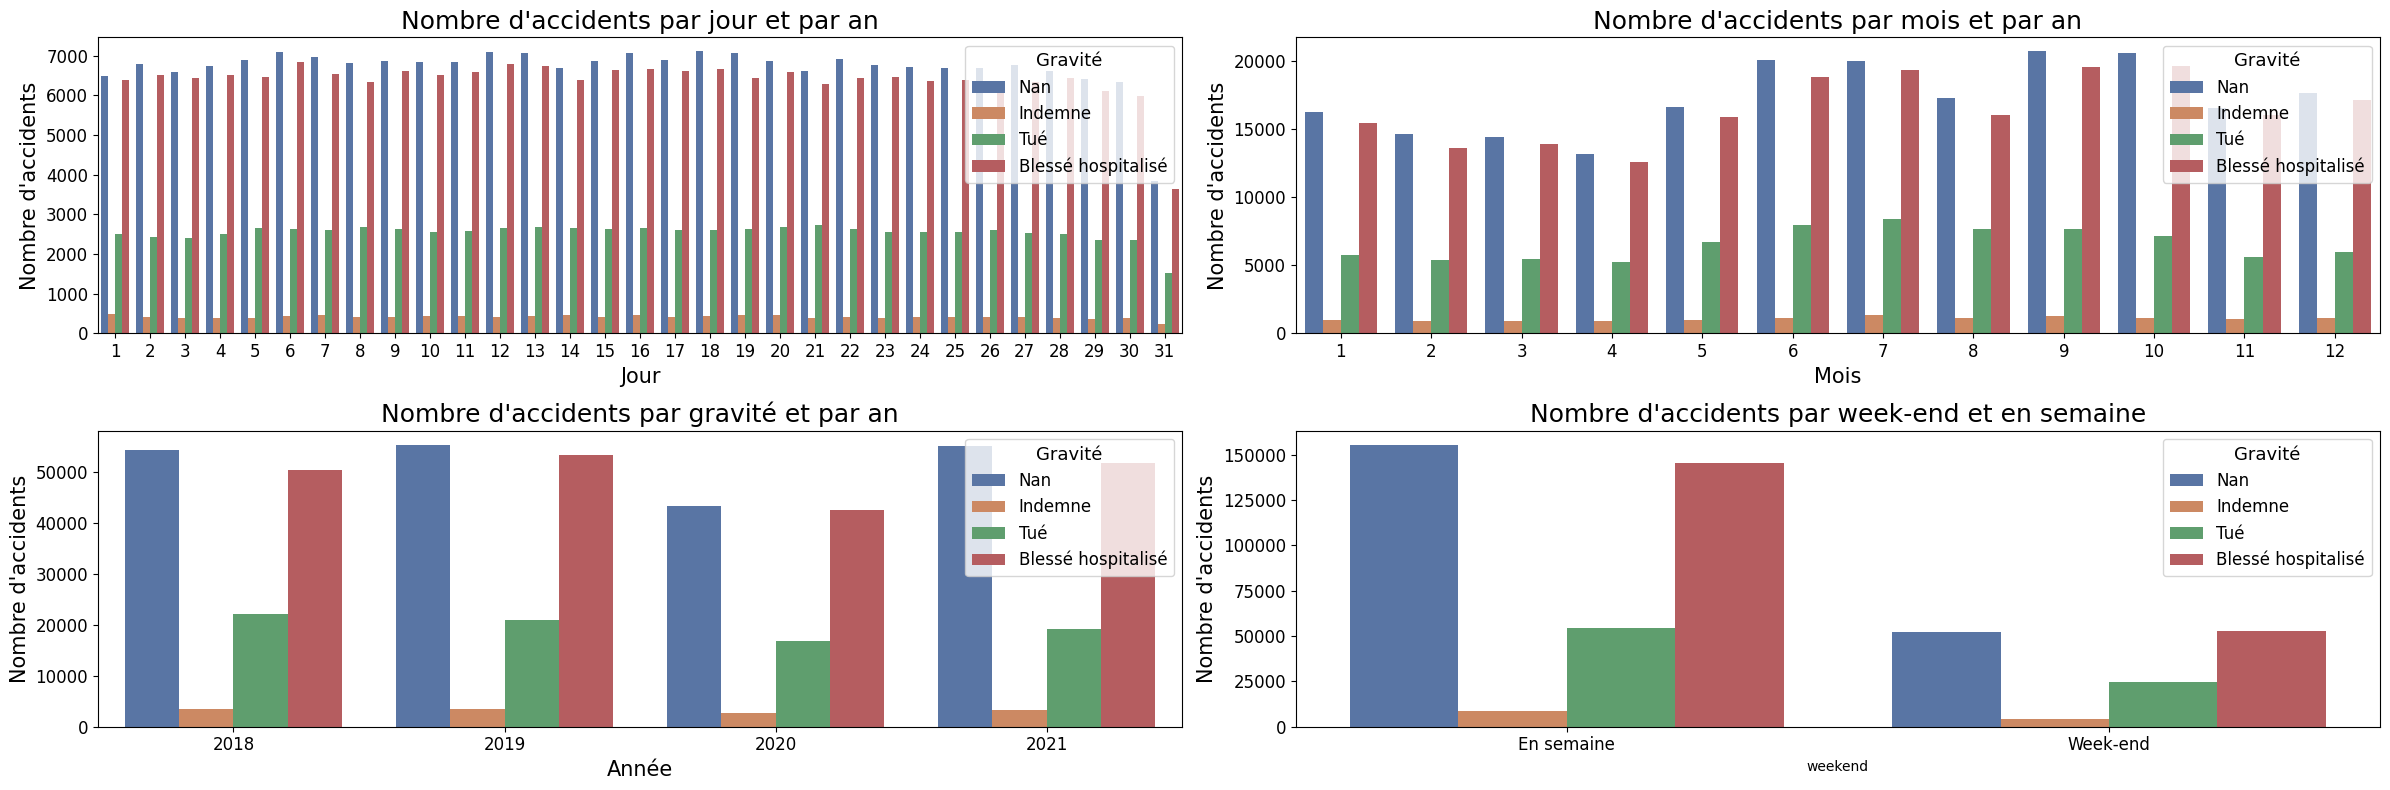

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 8), dpi=100)

ax1 = sns.countplot(data=dfc, x='jour', hue='grav', ax=axes[0, 0])
axes[0, 0].set_title("Nombre d'accidents par jour et par an", fontsize=18)
axes[0, 0].set_xlabel("Jour", fontsize=15)
axes[0, 0].set_ylabel("Nombre d'accidents", fontsize=15)
axes[0, 0].tick_params(axis='both', labelsize=12)
axes[0, 0].legend(title='Gravité', title_fontsize='13', loc='upper right', fontsize='12', labels=['Nan','Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])

ax2 = sns.countplot(data=dfc, x='mois', hue='grav', ax=axes[0, 1])
axes[0, 1].set_title("Nombre d'accidents par mois et par an", fontsize=18)
axes[0, 1].set_xlabel("Mois", fontsize=15)
axes[0, 1].set_ylabel("Nombre d'accidents", fontsize=15)
axes[0, 1].tick_params(axis='both', labelsize=12)
axes[0, 1].legend(title='Gravité', title_fontsize='13', loc='upper right', fontsize='12', labels=['Nan','Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])

ax3 = sns.countplot(data=dfc, x='an', hue='grav', ax=axes[1, 0])
axes[1, 0].set_title("Nombre d'accidents par gravité et par an", fontsize=18)
axes[1, 0].set_xlabel("Année", fontsize=15)
axes[1, 0].set_ylabel("Nombre d'accidents", fontsize=15)
axes[1, 0].tick_params(axis='both', labelsize=12)
axes[1, 0].legend(title='Gravité', title_fontsize='13', loc='upper right', fontsize='12', labels=['Nan','Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])

ax4 = sns.countplot(data=dfc, x='weekend', hue='grav', ax=axes[1, 1])
axes[1, 1].set_title("Nombre d'accidents par week-end et en semaine", fontsize=18)
axes[1, 1].set_xticklabels(['En semaine', 'Week-end'], fontsize=12)
axes[1, 1].set_ylabel("Nombre d'accidents", fontsize=15)
axes[1, 1].tick_params(axis='both', labelsize=12)
axes[1, 1].legend(title='Gravité', title_fontsize='13', loc='upper right', fontsize='12', labels=['Nan','Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])

plt.tight_layout()
plt.show()


### B. Colonne hrmn et création de la colonne heure et période de la journée

création de la colonne heure au format 'int' par cleanning de la colonne 'hrmn' (remplacement de ',' par ':')

In [43]:
# dfc = dfc.copy()

In [79]:
unique_hrmn_2021 = dfc[dfc["an"] != 18]["hrmn"].nunique()
print(unique_hrmn_2021)


3599


In [80]:
dfc["hrmn"] = dfc["hrmn"].astype(str)
dfc['hrmn'] = dfc['hrmn'].str.zfill(4)

In [81]:
pd.set_option('display.max_rows', 1000)
dfc.loc[dfc['an']==2018, 'hrmn'] = dfc['hrmn'].apply(lambda x: x[:2] + ":" + x[2:])
dfc['hrmn'][dfc['an']==2018].sort_values().head(10)
#dfa['hrmn'] = pd.to_datetime(dfa['hrmn'], format='%H:%M').dt.time

37610     00:01
89912     00:01
36949     00:01
75327     00:01
125914    00:01
125913    00:01
41167     00:01
95711     00:01
95710     00:01
95709     00:01
Name: hrmn, dtype: object

In [82]:
dfc["hrmn"].nunique()

1439

In [48]:
#dfc["hrmn"] = dfc["hrmn"].astype(str)
#dfc["heure"] = dfc["hrmn"].str.replace(':', '').astype(int)//100
#dfc["heure"] = dfc["heure"].apply(lambda x: (x // 100) + ((x % 100) / 60))

In [49]:
#dfa['hrmn'] = pd.to_datetime(dfa['hrmn'], format='%H:%M:%S').dt.time

In [83]:
print(dfc['hrmn'].isna().sum())
dfc['hrmn'].head()
print(len(dfc['hrmn'].value_counts()))
dfc['hrmn'].value_counts().head()

0
1439


hrmn
18:00    6894
17:30    5995
17:00    5870
18:30    5672
19:00    5349
Name: count, dtype: int64

In [84]:
# Convertir 'hrmn' en un objet datetime
dfc['datetime'] = pd.to_datetime(dfc['hrmn'], format='%H:%M')

# Extraire l'heure et les minutes sous forme de nombre à virgule flottante
dfc['heure_decimal'] = dfc['datetime'].dt.hour + dfc['datetime'].dt.minute/60

# Arrondir l'heure à l'heure la plus proche
dfc['heure'] = dfc['heure_decimal'].round().astype(int)

dfc.loc[dfc['heure'] == 24, 'heure'] = 0

In [52]:
#dfa['heure'] = dfa['hrmn'].apply(lambda x: x.hour)

In [85]:
dfc.head(5)

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,grav,date,weekday,weekend,datetime,heure_decimal,heure
0,201800000001,2018,1,24,15:05,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590,3.0,2018-01-24,Mercredi,0,1900-01-01 15:05:00,15.083333,15
1,201800000001,2018,1,24,15:05,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590,1.0,2018-01-24,Mercredi,0,1900-01-01 15:05:00,15.083333,15
2,201800000002,2018,2,12,10:15,1,2,7,7.0,7.0,11,Place du général de Gaul,M,5052936.0,293151.0,590,1.0,2018-02-12,Lundi,0,1900-01-01 10:15:00,10.250000,10
3,201800000002,2018,2,12,10:15,1,2,7,7.0,7.0,11,Place du général de Gaul,M,5052936.0,293151.0,590,4.0,2018-02-12,Lundi,0,1900-01-01 10:15:00,10.250000,10
4,201800000003,2018,3,4,11:35,1,2,3,1.0,7.0,477,Rue nationale,M,5051243.0,291714.0,590,3.0,2018-03-04,Dimanche,1,1900-01-01 11:35:00,11.583333,12


Création du graphique

In [86]:
dfc['heure'].value_counts()

heure
18    52210
16    38744
17    36271
19    31488
12    30961
14    30902
8     30118
20    29518
15    26141
10    25699
9     22985
13    21156
11    20262
21    15641
22    14976
7     12176
0     11061
23    10002
6      9084
2      7171
1      6837
4      5037
5      4615
3      4539
Name: count, dtype: int64

Etude sur la distribution des heures

Rapport entre les heures et la gravité de l'accident

In [87]:
gravite_par_heure_normalisee = pd.crosstab(dfc['heure'], dfc['grav'], normalize='index')
gravite_par_heure_normalisee
gravite_par_heure_normalisee_trie = gravite_par_heure_normalisee.sort_values(by=2, ascending=False)
gravite_par_heure_normalisee_trie
# Le nombre de tué varie entre 0.023882 et 0.031396 le wwek end

grav,1.0,2.0,3.0,4.0
heure,,,,
3,0.277337,0.058862,0.221561,0.442240
4,0.286877,0.058765,0.236450,0.417907
5,0.304659,0.054821,0.211268,0.429252
2,0.305397,0.051178,0.216288,0.427137
6,0.333260,0.048883,0.201475,0.416382
1,0.339722,0.045208,0.191075,0.423994
0,0.351031,0.042149,0.181892,0.424928
23,0.367863,0.034597,0.163984,0.433557
7,0.400772,0.033103,0.168802,0.397322


le taux de gravité semble un peu plus important de 0 à 6 heures du matin

Création du graphique

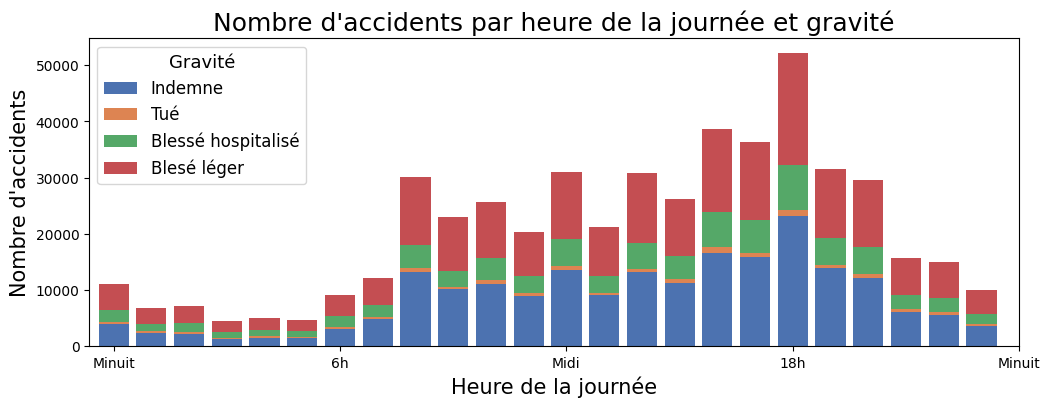

In [88]:
data = dfc.groupby(['heure', 'grav']).size().unstack()
ax = data.plot(kind='bar', stacked=True, figsize=(12, 4), width=0.8)
plt.xticks([0, 6, 12, 18, 24], ['Minuit', '6h', 'Midi', '18h', 'Minuit'], rotation=0)
plt.title("Nombre d'accidents par heure de la journée et gravité", fontsize=18)
plt.xlabel("Heure de la journée", fontsize=15)
plt.ylabel("Nombre d'accidents", fontsize=15)
ax.legend(title='Gravité', title_fontsize='13', loc='upper left', fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])

plt.show()


In [89]:
dfc['heure'].value_counts()

heure
18    52210
16    38744
17    36271
19    31488
12    30961
14    30902
8     30118
20    29518
15    26141
10    25699
9     22985
13    21156
11    20262
21    15641
22    14976
7     12176
0     11061
23    10002
6      9084
2      7171
1      6837
4      5037
5      4615
3      4539
Name: count, dtype: int64

test Khi deux

In [90]:
# H0 : hypothèse nulle : indépendance de la gravité par rapport à l'année

from scipy.stats import chi2_contingency, chi2

table_de_contingence = pd.crosstab(dfc['heure'], dfc['grav'])

stat, p_value, dl, expected_freq = chi2_contingency(table_de_contingence)
#print("degré de liberté : 4*30 = 120")
print("degré de liberté : ",dl)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dl)
print("valeur stat :", stat)
print("Valeur critique :", critical_value)
print("P-value:", p_value)

degré de liberté :  69
valeur stat : 4671.4395117675995
Valeur critique : 89.39120787250796
P-value: 0.0


On rejette l'hypothèse nulle. dépendance forte entre les deux variables

Variable période de la journée

In [91]:
def period_of_day(hour):
    if 6 <= hour < 12:
        return 'Matin'
    elif 12 <= hour < 18:
        return 'Après-midi'
    elif 18 <= hour < 24:
        return 'Soir'
    else:
        return 'Nuit'

dfc['periode'] = dfc['heure'].apply(period_of_day)

dfc['periode'].value_counts()
dfc['periode'].value_counts(normalize=True)*100

periode
Après-midi    37.013107
Soir          30.915767
Matin         24.181160
Nuit           7.889967
Name: proportion, dtype: float64

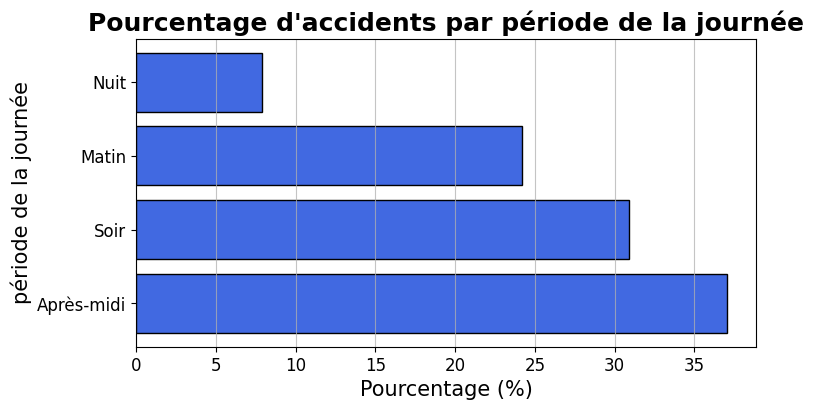

In [92]:
lum_percentages = dfc['periode'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 4))
plt.barh(lum_percentages.index, lum_percentages.values, color='royalblue', edgecolor='black')
plt.grid(axis='x', alpha=0.75)
plt.title("Pourcentage d'accidents par période de la journée", fontsize=18, fontweight='bold')
plt.ylabel("période de la journée", fontsize=15)
plt.xlabel("Pourcentage (%)", fontsize=15)
plt.yticks(range(0, 4), ['Après-midi', 'Soir', 'Matin', 'Nuit'], fontsize=12)
plt.xticks(fontsize=12)
plt.axvline(0, color='black', linewidth=1.3, alpha=0.7)
plt.show()

In [93]:
gravite_par_periode_normalisee = pd.crosstab(dfc['periode'], dfc['grav'], normalize='index')
gravite_par_periode_normalisee
gravite_par_periode_normalisee_trie = gravite_par_periode_normalisee.sort_values(by=2, ascending=False)
gravite_par_periode_normalisee_trie
# Le nombre de tué varie entre 0.023882 et 0.031396 le wwek end

grav,1.0,2.0,3.0,4.0
periode,,,,
Nuit,0.318522,0.049885,0.204815,0.426777
Matin,0.426597,0.025451,0.149109,0.398843
Soir,0.419189,0.024490,0.157514,0.398808
Après-midi,0.432418,0.022275,0.155738,0.389569


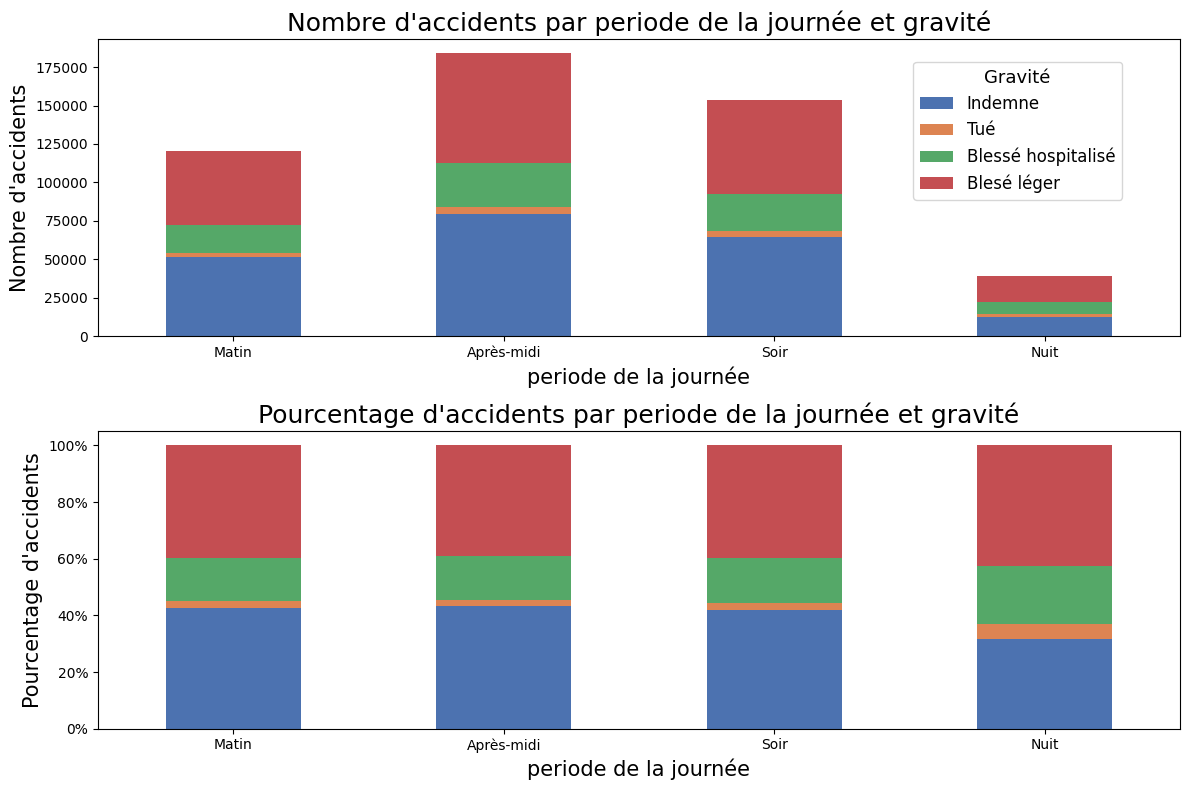

In [94]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))  # Crée un objet Figure avec deux axes (graphiques)

data = dfc.groupby(['periode', 'grav']).size().unstack()
data = data.reindex(['Matin', 'Après-midi', 'Soir', 'Nuit'])
data.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_xticklabels(['Matin', 'Après-midi', 'Soir', 'Nuit'], rotation=0)
axs[0].set_title("Nombre d'accidents par periode de la journée et gravité", fontsize=18)
axs[0].set_xlabel("periode de la journée", fontsize=15)
axs[0].set_ylabel("Nombre d'accidents", fontsize=15)
axs[0].legend(title='Gravité', title_fontsize='13', bbox_to_anchor=(0.85, 0.95), loc='upper center', fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])

# Calculer les pourcentages relatifs
data_perc = data.divide(data.sum(axis=1), axis=0)

data_perc.plot(kind='bar', stacked=True, ax=axs[1])  # Dessine le second graphique sur le second axe
axs[1].set_xticklabels(['Matin', 'Après-midi', 'Soir', 'Nuit'], rotation=0)
axs[1].set_title("Pourcentage d'accidents par periode de la journée et gravité", fontsize=18)
axs[1].set_xlabel("periode de la journée", fontsize=15)
axs[1].set_ylabel("Pourcentage d'accidents", fontsize=15)
axs[1].legend().remove()
axs[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()  # Assure que les graphiques ne se chevauchent pas
plt.show()


### C. Lieu des accidents
colonnes GPS, dep, com, agg, lat, long, adr

#### a. Colonne GPS

présente uniquement pour 2018 -> a supprimer

In [95]:
dfc['gps'].unique()

array(['M', nan, 'A', 'G', 'R', 'Y'], dtype=object)

In [96]:
dfc['gps'].value_counts()

gps
M    125368
R      1443
A      1415
G      1264
Y       576
Name: count, dtype: int64

In [97]:
dfc = dfc.drop('gps', axis=1)

#### b. Colonne adr : adresse

In [98]:
dfc.adr.nunique()

98247

-> trop de valeur et information non explicative

#### c. Colonne dep : département

In [99]:
dfc['dep'].unique()

array([590, 620, 800, 20, 600, 570, 760, 270, 350, 220, 290, 560, 140,
       500, 10, 610, 440, 490, 530, 720, 850, 330, 240, 400, 470, 640,
       860, 160, 170, 790, 870, 190, 310, 90, 320, 460, 650, 810, 690,
       210, 70, 260, 380, 420, 730, 740, 630, 30, 540, 550, 880, 670, 680,
       510, 80, 100, 520, 580, 710, 890, 250, 40, 390, 700, 130, 50, 60,
       830, 840, 340, 110, 300, 480, 660, 201, 202, 780, 910, 950, 770,
       450, 180, 280, 370, 410, 360, 900, 820, 120, 230, 430, 150, 920,
       930, 940, 750, '750', '972', '971', '973', '974', '976', '93',
       '92', '94', '87', '69', '38', '34', '13', '988', '2B', '91', '86',
       '83', '80', '78', '77', '76', '72', '71', '67', '66', '64', '60',
       '51', '50', '49', '45', '37', '35', '33', '31', '30', '29', '22',
       '19', '18', '17', '74', '81', '2', '59', '95', '63', '62', '2A',
       '84', '9', '73', '43', '10', '36', '16', '7', '21', '40', '24',
       '4', '85', '27', '28', '52', '68', '42', '82', '11', '9

problème avec 2018 (numéro de département *10) et de la Corse 2A et 2B

Transformation des valeur 2A et 2B en 20

In [100]:
dfc['dep'] = dfc['dep'].replace(['2A', '2B'], '20')

Transformation de la colonne dep de type str à int

In [101]:
#dfc['dep'] = dfc['dep'].astype(float).astype(int).astype(str)
dfc['dep'] = dfc['dep'].astype(int)

In [102]:
dfc['dep'].unique()

array([590, 620, 800,  20, 600, 570, 760, 270, 350, 220, 290, 560, 140,
       500,  10, 610, 440, 490, 530, 720, 850, 330, 240, 400, 470, 640,
       860, 160, 170, 790, 870, 190, 310,  90, 320, 460, 650, 810, 690,
       210,  70, 260, 380, 420, 730, 740, 630,  30, 540, 550, 880, 670,
       680, 510,  80, 100, 520, 580, 710, 890, 250,  40, 390, 700, 130,
        50,  60, 830, 840, 340, 110, 300, 480, 660, 201, 202, 780, 910,
       950, 770, 450, 180, 280, 370, 410, 360, 900, 820, 120, 230, 430,
       150, 920, 930, 940, 750, 972, 971, 973, 974, 976,  93,  92,  94,
        87,  69,  38,  34,  13, 988,  91,  86,  83,  78,  77,  76,  72,
        71,  67,  66,  64,  51,  49,  45,  37,  35,  33,  31,  29,  22,
        19,  18,  17,  74,  81,   2,  59,  95,  63,  62,  84,   9,  73,
        43,  36,  16,   7,  21,  24,   4,  85,  27,  28,  52,  68,  42,
        82,  11, 987,  44,  61,  14,  56,  58,  54,  47,  41,   3,  75,
         1,  57,  32,  39,  15,  23,   6,   5,  26,  48, 986,  8

Travail sur la colonne 2018

In [103]:
# Affichage des départements de l'année 2018
filtered_dfc = dfc[dfc['an'] == 2018]
unique_dep_values = filtered_dfc['dep'].unique()
print(sorted(unique_dep_values))

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 201, 202, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 971, 972, 973, 974, 976]


Transformation des valeurs 201 et 202 en colonne 200 (corse)

In [104]:
dfc['dep'] = dfc['dep'].apply(lambda x: 200 if x in [201, 202] else x)

In [105]:
#dfc["dep"] = dfc["dep"].astype(int)
dfc["dep"] = dfc.apply(lambda x: x["dep"] / 10 if x["an"] == 2018 and x["dep"] < 970 else x["dep"], axis=1)

In [74]:
# 1->95 = France métropolitaine
# 971, 972, 973, 974, 976 = DOM
# 975, 977, 978, 986, 987 = COM
# 988 = POM
# 988 = ile de Clipperton -> pas d'habitant
# porblème avec 2A et 2B
#-> tout est ok

In [106]:
dfc['dep'].unique()

array([ 59.,  62.,  80.,   2.,  60.,  57.,  76.,  27.,  35.,  22.,  29.,
        56.,  14.,  50.,   1.,  61.,  44.,  49.,  53.,  72.,  85.,  33.,
        24.,  40.,  47.,  64.,  86.,  16.,  17.,  79.,  87.,  19.,  31.,
         9.,  32.,  46.,  65.,  81.,  69.,  21.,   7.,  26.,  38.,  42.,
        73.,  74.,  63.,   3.,  54.,  55.,  88.,  67.,  68.,  51.,   8.,
        10.,  52.,  58.,  71.,  89.,  25.,   4.,  39.,  70.,  13.,   5.,
         6.,  83.,  84.,  34.,  11.,  30.,  48.,  66.,  20.,  78.,  91.,
        95.,  77.,  45.,  18.,  28.,  37.,  41.,  36.,  90.,  82.,  12.,
        23.,  43.,  15.,  92.,  93.,  94.,  75., 972., 971., 973., 974.,
       976., 988., 987., 986., 977., 978., 975.])

Etude sur la distribution des départements

In [107]:
print(dfc.dep.nunique())
dfc['dep'] = dfc['dep'].astype(int)
dfc['dep'].value_counts().cumsum()/len(dfc['dep'])

106


dep
75     0.088779
13     0.143511
93     0.195203
94     0.239621
69     0.283370
92     0.323840
91     0.349942
33     0.374773
6      0.392414
77     0.409091
59     0.425381
95     0.440512
83     0.455327
64     0.469690
31     0.483513
35     0.497295
78     0.511065
974    0.524474
34     0.537643
67     0.550228
38     0.562567
29     0.574710
76     0.586675
37     0.598347
49     0.609979
20     0.620028
44     0.629905
17     0.639738
45     0.649395
54     0.658852
62     0.668278
74     0.677498
56     0.686431
973    0.695348
14     0.704181
51     0.712862
60     0.721285
80     0.729653
1      0.737945
972    0.746082
71     0.754125
30     0.762160
27     0.769871
50     0.777435
42     0.784929
68     0.792212
971    0.799459
63     0.806688
87     0.813599
22     0.820490
72     0.826989
66     0.833422
10     0.839743
11     0.846021
57     0.852269
26     0.858310
85     0.864100
25     0.869275
988    0.874408
5      0.879064
86     0.883650
84     0.888140
73  

In [108]:
### diagramme affichant côtes à côtes, les 10 départements avec le plus d'accidents, et les 10 départements avec le moins d'accidents.

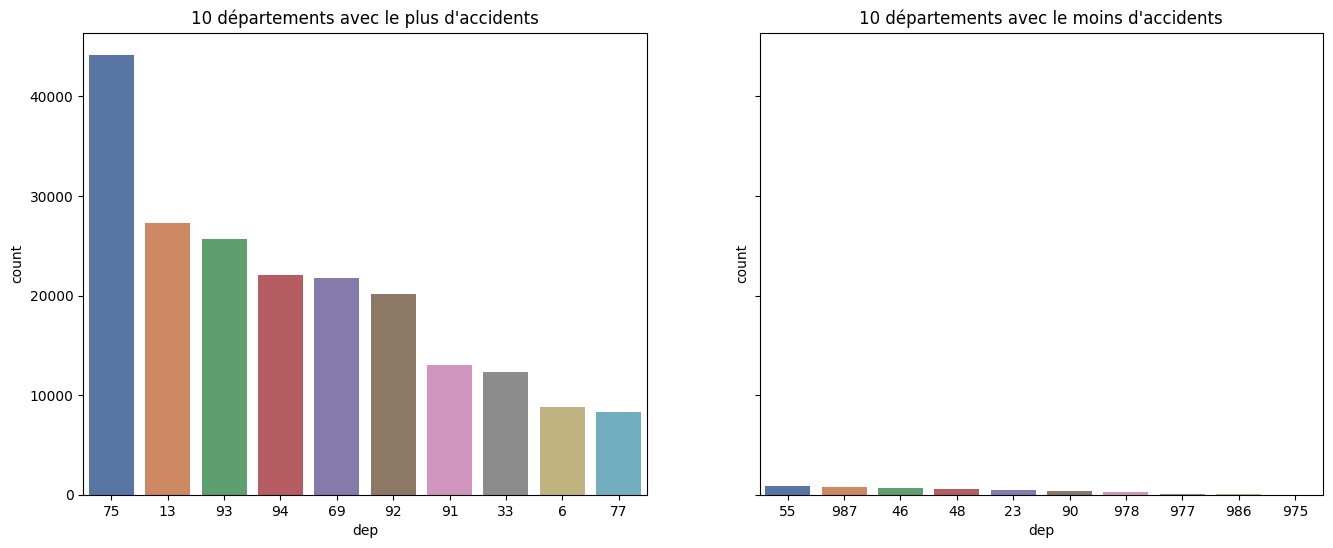

In [109]:
max_col = dfc['dep'].value_counts().head(10)
min_col = dfc['dep'].value_counts().tail(10)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6), sharey=True)

sns.barplot(x=max_col.index, y=max_col, order=max_col.index, ax=ax1)
# max_col.plot.bar(ax=ax1)
ax1.title.set_text("10 départements avec le plus d'accidents")

sns.barplot(x=min_col.index, y=min_col, order=min_col.index, ax=ax2)
# min_col.plot.bar(ax=ax2)
ax2.title.set_text("10 départements avec le moins d'accidents");

In [79]:
# Rapport entre les départements et la gravité de l'accident

In [110]:
gravite_par_departement_normalisee = pd.crosstab(dfc['dep'], dfc['grav'], normalize='index')
gravite_par_departement_trie = gravite_par_departement_normalisee.sort_values(by=2, ascending=False)
gravite_par_departement_trie
# dpartement 987 = 0.11 tandis que Paris 0.0036. Le département semble joué un rôle dans la gravité de l'accident

grav,1.0,2.0,3.0,4.0
dep,,,,
987,0.368356,0.110012,0.372064,0.149567
986,0.390625,0.078125,0.343750,0.187500
978,0.422131,0.077869,0.368852,0.131148
40,0.377970,0.076314,0.369330,0.176386
46,0.404380,0.074453,0.379562,0.141606
70,0.377166,0.074414,0.359837,0.188583
81,0.354257,0.070851,0.281541,0.293350
2,0.383745,0.068416,0.295267,0.252572
8,0.356492,0.068337,0.328018,0.247153


In [111]:
# H0 : hypothèse nulle : indépendance de la gravité par rapport à l'année

from scipy.stats import chi2_contingency, chi2

table_de_contingence = pd.crosstab(dfc['dep'], dfc['grav'])

stat, p_value, dl, expected_freq = chi2_contingency(table_de_contingence)
#print("degré de liberté : 4*30 = 120")
print("degré de liberté : ",dl)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dl)
print("valeur stat :", stat)
print("Valeur critique :", critical_value)
print("P-value:", p_value)

degré de liberté :  315
valeur stat : 38161.197907398266
Valeur critique : 357.39088036782084
P-value: 0.0


On rejette l'hypothèse nulle. dépendance forte entre les deux variables

#### d. Colonne com : commune

In [112]:
dfc.com.isna().sum()

0

In [113]:
dfc.com.nunique()

19893

In [114]:
# Rapport gravité commune

In [115]:
gravite_par_commune_normalisee = pd.crosstab(dfc['com'], dfc['grav'], normalize='index')
gravite_par_commune_trie = gravite_par_commune_normalisee.sort_values(by=2, ascending=False)
gravite_par_commune_trie
# dpartement 987 = 0.11 tandis que Paris 0.0036. Le département semble joué un rôle dans la gravité de l'accident

grav,1.0,2.0,3.0,4.0
com,,,,
38398,0.000000,1.0,0.000000,0.000000
76599,0.000000,1.0,0.000000,0.000000
09074,0.000000,1.0,0.000000,0.000000
51235,0.000000,1.0,0.000000,0.000000
23218,0.000000,1.0,0.000000,0.000000
...,...,...,...,...
50230,0.100000,0.0,0.300000,0.600000
50232,0.000000,0.0,0.000000,1.000000
50235,0.500000,0.0,0.000000,0.500000


A supprimer

#### e. Colonnes lat et long

remplacement des ',' par des '.' dans les colonnes 'lat' et 'long'

In [116]:
#dfct = dfc.copy()

In [117]:
#dfct.info()

In [118]:
#dfct

valeur manquante

In [119]:
dfc.isna().sum()/len(dfc)*100

Num_Acc          0.000000
an               0.000000
mois             0.000000
jour             0.000000
hrmn             0.000000
lum              0.000000
agg              0.000000
int              0.000000
atm              0.001809
col              0.001608
com              0.000000
adr              0.898524
lat              0.827582
long             0.827582
dep              0.000000
grav             0.012058
date             0.000000
weekday          0.000000
weekend          0.000000
datetime         0.000000
heure_decimal    0.000000
heure            0.000000
periode          0.000000
dtype: float64

In [120]:
dfc['lat'] = dfc['lat'].astype(str).str.replace(',', '.').astype(float)
dfc['long'] = dfc['long'].astype(str).str.replace(',', '.').astype(float)

In [121]:
dfc["lat"] = pd.to_numeric(dfc["lat"])
dfc["long"] = pd.to_numeric(dfc["long"])
dfc["lat"] = dfc.apply(lambda x: x["lat"] / 100000 if x["an"] == 2018 else x["lat"], axis=1)
dfc["long"] = dfc.apply(lambda x: x["long"] / 100000 if x["an"] == 2018 else x["long"], axis=1)

Nombre de valeurs différentes

In [122]:
print(dfc['lat'].nunique())
display(dfc['long'].nunique())

186225


192476

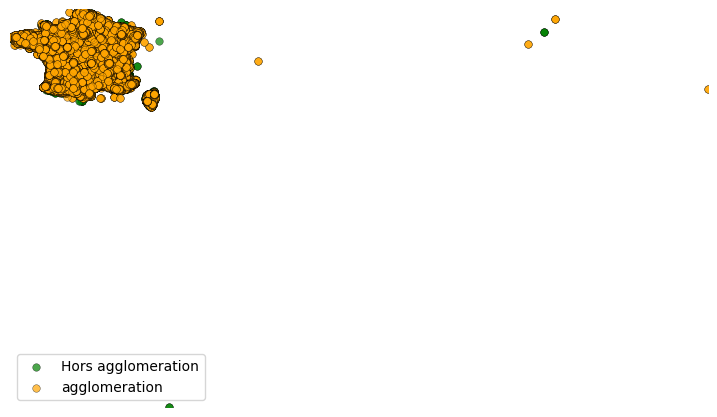

In [123]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

dfc_m = dfc[dfc['dep'] < 900]
dfc_m = dfc_m[(dfc_m['lat'] != 0.0) & (dfc_m['long'] != 0.0)].dropna(subset=['lat', 'long'], axis=0)

geometry = [Point(xy) for xy in zip(dfc_m['long'], dfc_m['lat'])]
geo_df = gpd.GeoDataFrame(dfc_m, geometry=geometry)

figure, ax = plt.subplots(figsize=(9, 12))
plt.axis('off')

geo_df[geo_df['agg'] == 1].plot(ax=ax, markersize=30, alpha=0.7, color='green', label='Hors agglomeration', marker='o', edgecolor='black', linewidth=0.3)
geo_df[geo_df['agg'] == 2].plot(ax=ax, markersize=30, alpha=0.7, color='orange', label='agglomeration', marker='o', edgecolor='black', linewidth=0.3)

ax.set_xlim(geo_df.total_bounds[[0, 2]])
ax.set_ylim(geo_df.total_bounds[[1, 3]])

plt.legend()
plt.show()


La lattitude et la longitude ne vont pas nous être utile pour déterminer la gravité des accidents. d'autres caratéristique sur les lieux seront plus profitable : département, agglomération, intersection

#### f. Colonne agg : Agglomération

In [124]:
dfc.isna().sum()

Num_Acc             0
an                  0
mois                0
jour                0
hrmn                0
lum                 0
agg                 0
int                 0
atm                 9
col                 8
com                 0
adr              4471
lat              4118
long             4118
dep                 0
grav               60
date                0
weekday             0
weekend             0
datetime            0
heure_decimal       0
heure               0
periode             0
dtype: int64

In [125]:
dfc["agg"].value_counts(normalize=True)*100

agg
2    62.233467
1    37.766533
Name: proportion, dtype: float64

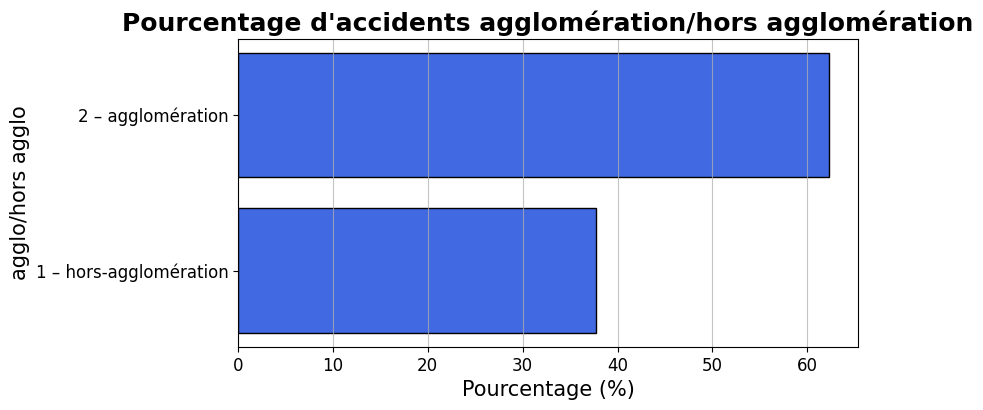

In [126]:

agg_percentages = dfc['agg'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 4))
plt.barh(agg_percentages.index, agg_percentages.values, color='royalblue', edgecolor='black')
plt.grid(axis='x', alpha=0.75)
plt.title("Pourcentage d'accidents agglomération/hors agglomération", fontsize=18, fontweight='bold')
plt.xlabel("Pourcentage (%)", fontsize=15)
plt.ylabel("agglo/hors agglo", fontsize=15)
labels = ['2 – agglomération', '1 – hors-agglomération']
plt.yticks(ticks=agg_percentages.index, labels=labels, fontsize=12)
plt.xticks(fontsize=12)
plt.axvline(0, color='black', linewidth=1.3, alpha=0.7)
plt.show()

In [98]:
# Rapport entre la gravité et l'agglomération

In [127]:
gravite_agg_normalisee = pd.crosstab(dfc['agg'], dfc['grav'], normalize='index')
gravite_agg_normalisee
gravite_agg_normalisee_trie = gravite_agg_normalisee.sort_values(by=2, ascending=False)
gravite_agg_normalisee_trie
# les accidentes hors agglomération ont un taux de mortalité 3.5 fois supérieurs qu'en agglomération

grav,1.0,2.0,3.0,4.0
agg,,,,
1,0.379998,0.046505,0.215579,0.357919
2,0.440961,0.013404,0.123947,0.421689


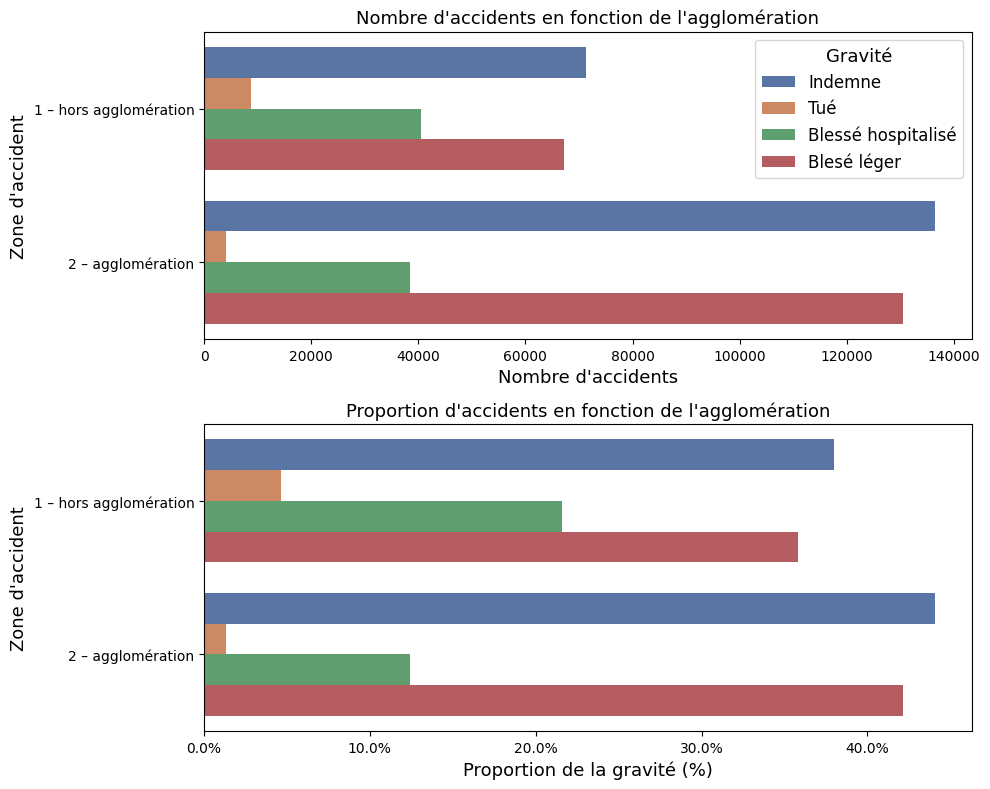

In [128]:
import matplotlib.ticker as mtick

sns.set_palette("deep")

# Configuration de la figure
plt.figure(figsize=(10, 8))

# Premier graphique : Nombre d'accidents en fonction de la lumière par gravité
plt.subplot(2, 1, 1)
sns.countplot(data=dfc, y='agg', hue='grav')
plt.title("Nombre d'accidents en fonction de l'agglomération", fontsize=13)
plt.ylabel("Zone d'accident", fontsize=13)
plt.xlabel("Nombre d'accidents", fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right', fontsize='12')
labels = ['1 – hors agglomération', '2 – agglomération']
plt.yticks(ticks=range(2), labels=labels)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right',fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])

# Calcul des proportions
proportions = dfc.groupby('agg')['grav'].value_counts(normalize=True).reset_index(name='proportion')

# Deuxième graphique : Proportion d'accidents par type de lumière et gravité
plt.subplot(2, 1, 2)
sns.barplot(x='proportion', y='agg', hue='grav', data=proportions, orient='h')
plt.title('Proportion d\'accidents en fonction de l\'agglomération', fontsize=13)
plt.ylabel('Zone d\'accident', fontsize=13)
plt.xlabel('Proportion de la gravité (%)', fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right')
plt.yticks(ticks=range(2), labels=labels)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend().remove()
plt.tight_layout()
plt.show()

Beaucoup plus d'accident en agglomération mais moins grave

In [129]:
# H0 : hypothèse nulle : indépendance de la gravité par rapport à l'année

from scipy.stats import chi2_contingency, chi2

table_de_contingence = pd.crosstab(dfc['agg'], dfc['grav'])

stat, p_value, dl, expected_freq = chi2_contingency(table_de_contingence)
#print("degré de liberté : 4*30 = 120")
print("degré de liberté : ",dl)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dl)
print("valeur stat :", stat)
print("Valeur critique :", critical_value)
print("P-value:", p_value)

degré de liberté :  3
valeur stat : 13374.712500845651
Valeur critique : 7.814727903251179
P-value: 0.0


On rejette l'hypothèse nulle. dépendance forte entre les deux variables

#### g. Colonne int : Intersection

In [130]:
dfc.int.isna().sum()

0

In [131]:
dfc['int'].value_counts(normalize=True)*100

int
 1    64.695314
 2    12.894247
 3    10.517812
 9     4.320591
 6     3.544054
 4     2.209231
 7     1.091251
 5     0.562105
 8     0.164994
-1     0.000402
Name: proportion, dtype: float64

In [132]:
dfc['int'] = dfc['int'].replace(-1, np.nan)

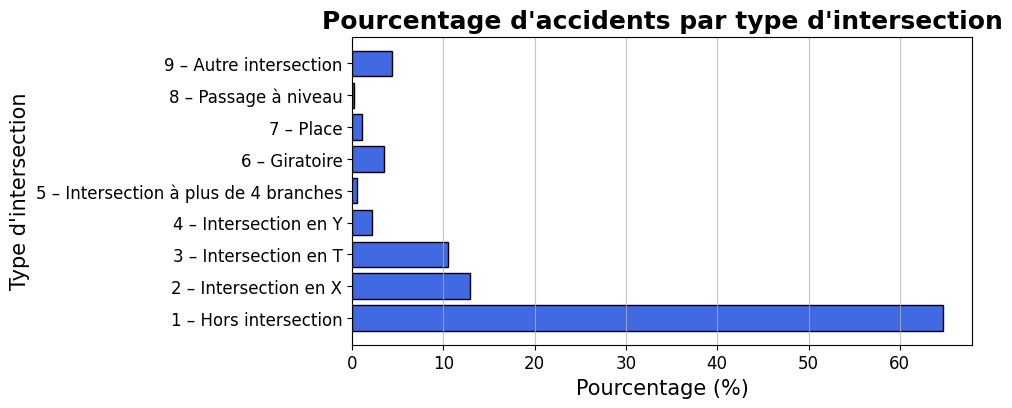

In [133]:
lum_percentages = dfc['int'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 4))
plt.barh(lum_percentages.index, lum_percentages.values, color='royalblue', edgecolor='black')
plt.grid(axis='x', alpha=0.75)
plt.title("Pourcentage d'accidents par type d'intersection", fontsize=18, fontweight='bold')
plt.ylabel("Type d'intersection", fontsize=15)
plt.xlabel("Pourcentage (%)", fontsize=15)
plt.yticks(range(1, 10), ['1 – Hors intersection', '2 – Intersection en X', '3 – Intersection en T', '4 – Intersection en Y', '5 – Intersection à plus de 4 branches', '6 – Giratoire', '7 – Place', '8 – Passage à niveau', '9 – Autre intersection'], fontsize=12)
plt.xticks(fontsize=12)
plt.axvline(0, color='black', linewidth=1.3, alpha=0.7)
plt.show()

Présence de valeurs non renseignées = -1

Traitement de la valeur -1

In [134]:
gravite_intersection_normalisee = pd.crosstab(dfc['int'], dfc['grav'], normalize='index')
gravite_intersection_normalisee
gravite_intersection_normalisee_trie = gravite_intersection_normalisee.sort_values(by=2, ascending=False)
gravite_intersection_normalisee_trie
# Valeur 8 et 1 (passage à niveau et hors intersection plus grave tandis que 5 et 7 beuaucoup moins grave)

grav,1.0,2.0,3.0,4.0
int,,,,
8.0,0.429963,0.095006,0.144945,0.330085
1.0,0.402498,0.032143,0.172563,0.392796
9.0,0.426099,0.018795,0.149663,0.405443
4.0,0.438734,0.017375,0.140999,0.402893
6.0,0.433910,0.015991,0.153445,0.396654
3.0,0.454205,0.013701,0.137891,0.394202
2.0,0.450158,0.012610,0.122707,0.414525
5.0,0.447622,0.009653,0.097962,0.444762
7.0,0.459300,0.006446,0.071639,0.462615


Diagramme

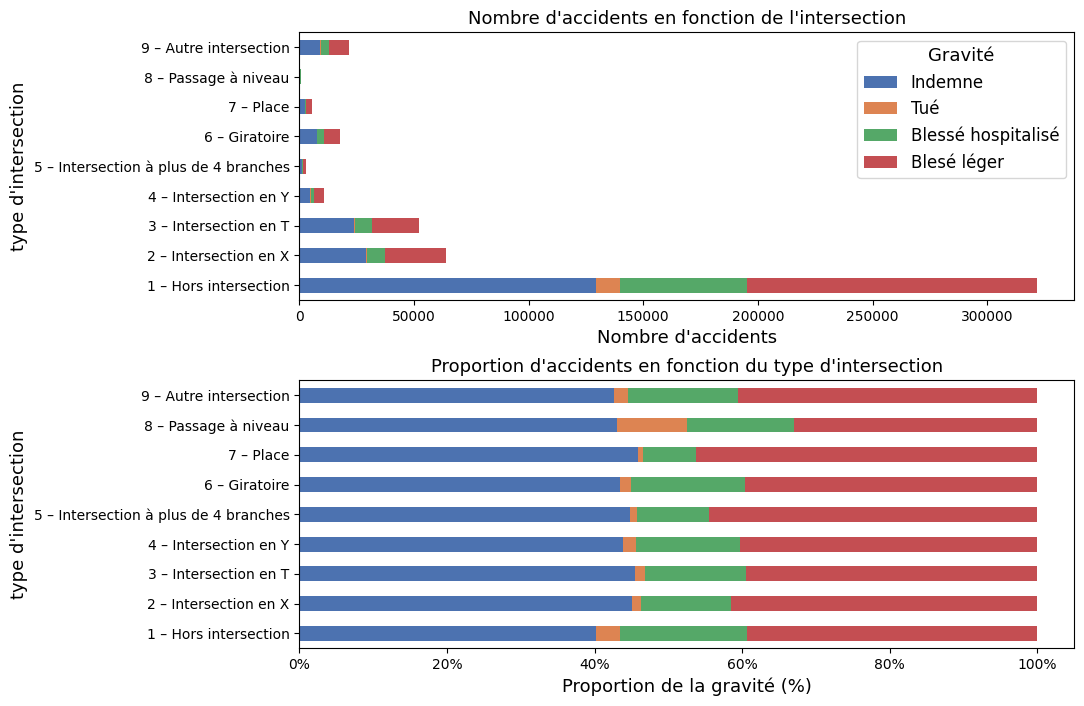

In [135]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

counts = dfc.groupby(['int', 'grav']).size().unstack(level=1)
proportions = counts.divide(counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.3)


# Premier graphique : Nombre d'accidents en fonction de l'intersection
counts.plot(kind='barh', stacked=True, ax=ax[0])
ax[0].set_title("Nombre d'accidents en fonction de l'intersection", fontsize=13)
ax[0].set_ylabel("type d'intersection", fontsize=13)
ax[0].set_xlabel("Nombre d'accidents", fontsize=13)
#ax[0].legend(title='Gravité', fontsize='12')
ax[0].legend(title='Gravité', title_fontsize='13', loc='upper right',fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])

labels = ['1 – Hors intersection', '2 – Intersection en X', '3 – Intersection en T','4 – Intersection en Y', '5 – Intersection à plus de 4 branches', '6 – Giratoire', '7 – Place', '8 – Passage à niveau', '9 – Autre intersection' ]
ax[0].set_yticklabels(labels)

# Deuxième graphique : Proportion d'accidents par type d'intersection
proportions.plot(kind='barh', stacked=True, ax=ax[1])
ax[1].set_title("Proportion d'accidents en fonction du type d'intersection", fontsize=13)
ax[1].set_ylabel("type d'intersection", fontsize=13)
ax[1].set_xlabel('Proportion de la gravité (%)', fontsize=13)
#ax[1].legend(title='Gravité', fontsize='12')
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax[1].set_yticklabels(labels)
ax[1].legend().remove()

#plt.tight_layout()
plt.show()



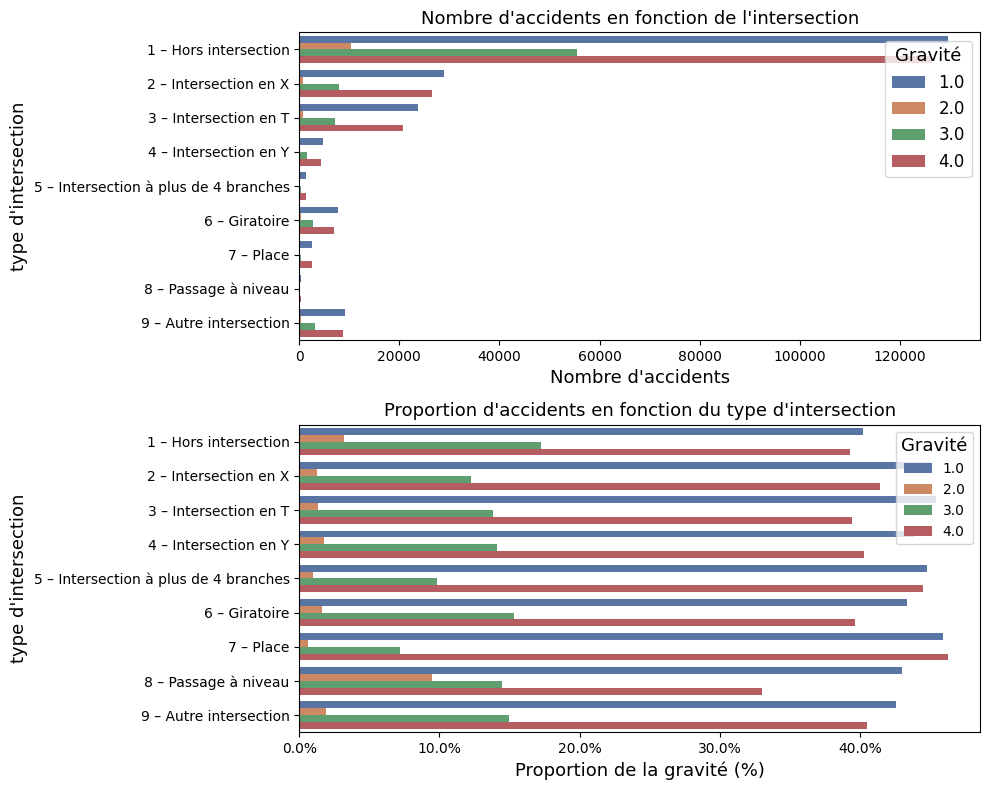

In [136]:
import matplotlib.ticker as mtick

sns.set_palette("deep")

# Configuration de la figure
plt.figure(figsize=(10, 8))

# Premier graphique : Nombre d'accidents en fonction de la lumière par gravité
plt.subplot(2, 1, 1)
sns.countplot(data=dfc, y='int', hue='grav')
plt.title("Nombre d'accidents en fonction de l'intersection", fontsize=13)
plt.ylabel("type d'intersection", fontsize=13)
plt.xlabel("Nombre d'accidents", fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right', fontsize='12')
labels = ['1 – Hors intersection', '2 – Intersection en X', '3 – Intersection en T','4 – Intersection en Y', '5 – Intersection à plus de 4 branches', '6 – Giratoire', '7 – Place', '8 – Passage à niveau', '9 – Autre intersection' ]
plt.yticks(ticks=range(9), labels=labels)

# Calcul des proportions
proportions = dfc.groupby('int')['grav'].value_counts(normalize=True).reset_index(name='proportion')

# Deuxième graphique : Proportion d'accidents par type de lumière et gravité
plt.subplot(2, 1, 2)
sns.barplot(x='proportion', y='int', hue='grav', data=proportions, orient='h')
plt.title("Proportion d\'accidents en fonction du type d'intersection", fontsize=13)
plt.ylabel("type d'intersection", fontsize=13)
plt.xlabel('Proportion de la gravité (%)', fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right')
plt.yticks(ticks=range(9), labels=labels)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()

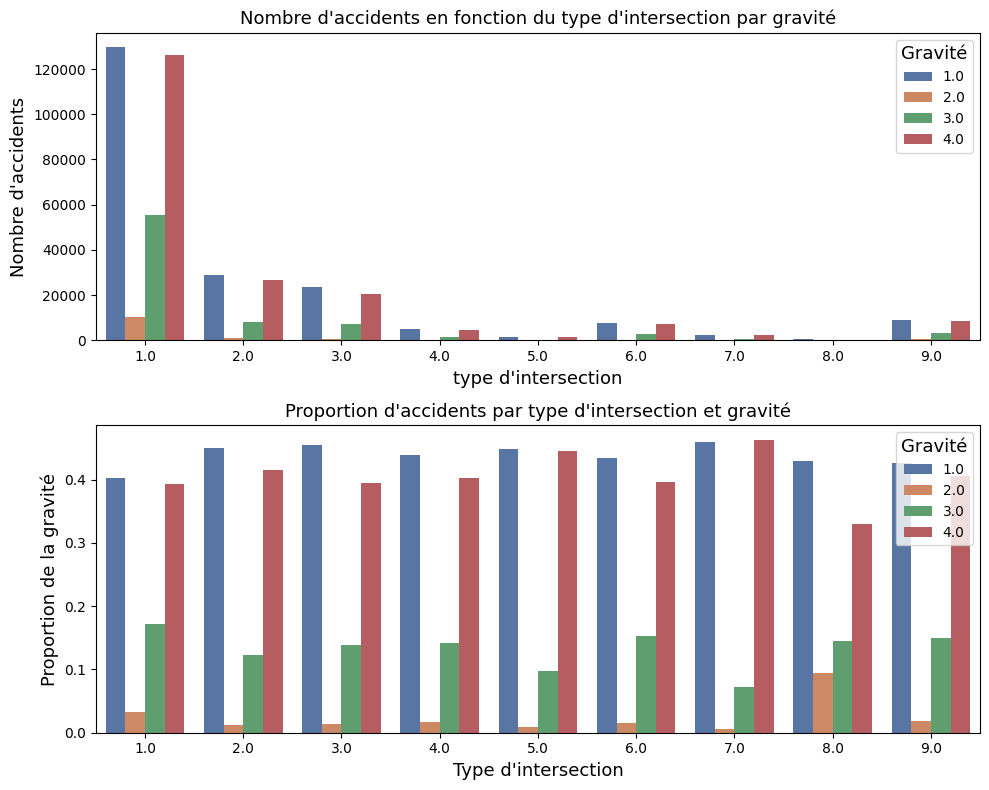

In [137]:


sns.set_palette("deep")

# Configuration de la figure
plt.figure(figsize=(10, 8))

# Premier graphique : Nombre d'accidents en fonction du type d'intersection par gravité
plt.subplot(2, 1, 1)
sns.countplot(data=dfc, x='int', hue='grav')
plt.title("Nombre d'accidents en fonction du type d'intersection par gravité", fontsize=13)
plt.xlabel("type d'intersection", fontsize=13)
plt.ylabel("Nombre d'accidents", fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right')

# Calcul des proportions
proportions = dfc.groupby('int')['grav'].value_counts(normalize=True).reset_index(name='proportion')

# Deuxième graphique : Proportion d'accidents par type d'intersection et gravité
plt.subplot(2, 1, 2)
sns.barplot(x='int', y='proportion', hue='grav', data=proportions)
plt.title('Proportion d\'accidents par type d\'intersection et gravité', fontsize=13)
plt.xlabel('Type d\'intersection', fontsize=13)
plt.ylabel('Proportion de la gravité', fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right')

plt.tight_layout()
plt.show()



65% des accidents ont lieu hors agglomération

test Khi2

In [138]:
# H0 : hypothèse nulle : indépendance de la gravité par rapport à l'année

from scipy.stats import chi2_contingency, chi2

table_de_contingence = pd.crosstab(dfc['int'], dfc['grav'])

stat, p_value, dl, expected_freq = chi2_contingency(table_de_contingence)
#print("degré de liberté : 4*30 = 120")
print("degré de liberté : ",dl)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dl)
print("valeur stat :", stat)
print("Valeur critique :", critical_value)
print("P-value:", p_value)

degré de liberté :  24
valeur stat : 3754.52317250985
Valeur critique : 36.41502850180731
P-value: 0.0


### D. Autres variables

#### a. Colonne lum : lumière

In [139]:
dfc.lum.isna().sum()

0

In [140]:
dfc['lum'].value_counts(normalize=True)*100

lum
 1    67.615365
 5    15.276310
 3     9.759161
 2     6.462899
 4     0.885059
-1     0.001206
Name: proportion, dtype: float64

Présence de valeurs non renseignées = -1

Traitement de la valeur -1 -> nan

In [141]:
dfc['lum'] = dfc['lum'].replace(-1, np.nan)

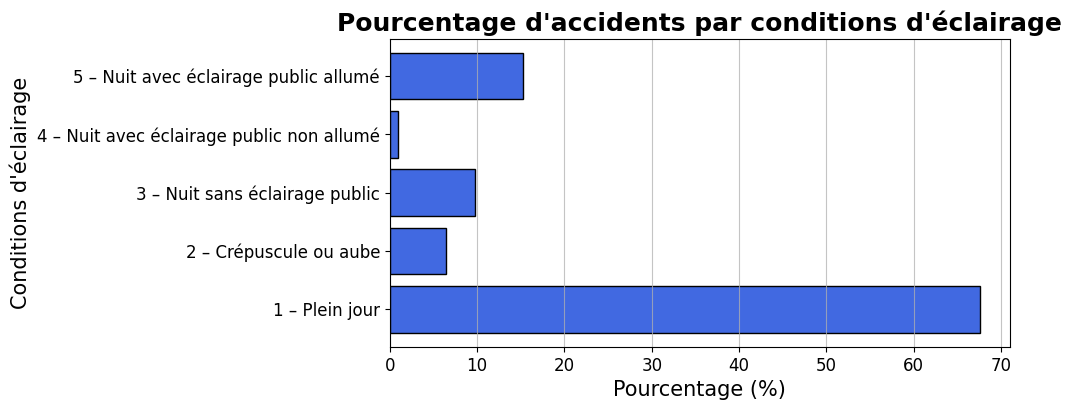

In [142]:
lum_percentages = dfc['lum'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 4))
plt.barh(lum_percentages.index, lum_percentages.values, color='royalblue', edgecolor='black')
plt.grid(axis='x', alpha=0.75)
plt.title("Pourcentage d'accidents par conditions d'éclairage", fontsize=18, fontweight='bold')
plt.ylabel("Conditions d'éclairage", fontsize=15)
plt.xlabel("Pourcentage (%)", fontsize=15)
plt.yticks(range(1, 6), ['1 – Plein jour', '2 – Crépuscule ou aube', '3 – Nuit sans éclairage public', '4 – Nuit avec éclairage public non allumé', '5 – Nuit avec éclairage public allumé'], fontsize=12)
plt.xticks(fontsize=12)
plt.axvline(0, color='black', linewidth=1.3, alpha=0.7)
plt.show()

Rapport lumière et gravité

In [143]:
gravite_lumiere_normalisee = pd.crosstab(dfc['lum'], dfc['grav'], normalize='index')
gravite_lumiere_normalisee
gravite_lumiere_normalisee_trie = gravite_lumiere_normalisee.sort_values(by=2, ascending=False)
gravite_lumiere_normalisee_trie
# Nuit sans éclairage public plus grave nuit avec éclairage public puis le reste

grav,1.0,2.0,3.0,4.0
lum,,,,
3.0,0.337940,0.064544,0.231135,0.366381
4.0,0.383061,0.035876,0.156222,0.424841
2.0,0.409703,0.028829,0.174250,0.387218
1.0,0.432990,0.021913,0.152874,0.392222
5.0,0.407926,0.017079,0.130844,0.444151


Graphique

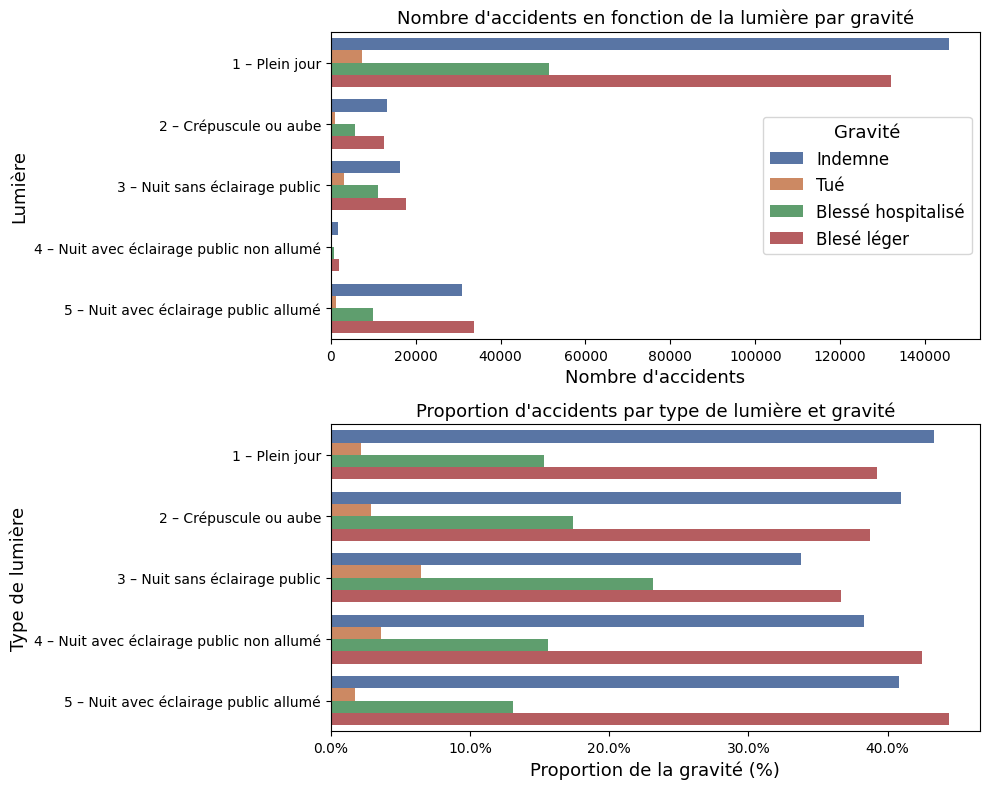

In [144]:
import matplotlib.ticker as mtick

sns.set_palette("deep")

# Configuration de la figure
plt.figure(figsize=(10, 8))

# Premier graphique : Nombre d'accidents en fonction de la lumière par gravité
plt.subplot(2, 1, 1)
sns.countplot(data=dfc, y='lum', hue='grav')
plt.title("Nombre d'accidents en fonction de la lumière par gravité", fontsize=13)
plt.ylabel("Lumière", fontsize=13)
plt.xlabel("Nombre d'accidents", fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='center right',fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])
labels = ['1 – Plein jour', '2 – Crépuscule ou aube', '3 – Nuit sans éclairage public', '4 – Nuit avec éclairage public non allumé', '5 – Nuit avec éclairage public allumé']
plt.yticks(ticks=range(5), labels=labels)

# Calcul des proportions
proportions = dfc.groupby('lum')['grav'].value_counts(normalize=True).reset_index(name='proportion')

# Deuxième graphique : Proportion d'accidents par type de lumière et gravité
plt.subplot(2, 1, 2)
sns.barplot(x='proportion', y='lum', hue='grav', data=proportions, orient='h')
plt.title('Proportion d\'accidents par type de lumière et gravité', fontsize=13)
plt.ylabel('Type de lumière', fontsize=13)
plt.xlabel('Proportion de la gravité (%)', fontsize=13)
#plt.legend(title='Gravité', title_fontsize='13', loc='upper right')
plt.legend().remove()
plt.yticks(ticks=range(5), labels=labels)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()



68% des accidents ont lieu en plein jour

test Khi2

In [145]:
# H0 : hypothèse nulle : indépendance de la gravité par rapport à l'année

from scipy.stats import chi2_contingency, chi2

table_de_contingence = pd.crosstab(dfc['lum'], dfc['grav'])

stat, p_value, dl, expected_freq = chi2_contingency(table_de_contingence)
#print("degré de liberté : 4*30 = 120")
print("degré de liberté : ",dl)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dl)
print("valeur stat :", stat)
print("Valeur critique :", critical_value)
print("P-value:", p_value)

degré de liberté :  12
valeur stat : 6897.87362003029
Valeur critique : 21.02606981748307
P-value: 0.0


#### b. Colonne atm : conditions atmosphèriques

In [146]:
dfc.atm.isna().sum()

9

In [147]:
dfc['atm'].value_counts(normalize=True)*100

atm
 1.0    79.325743
 2.0    11.027061
 8.0     3.724590
 3.0     2.288453
 7.0     1.778591
 5.0     0.627029
 4.0     0.499613
 9.0     0.468262
 6.0     0.254228
-1.0     0.006431
Name: proportion, dtype: float64

Présence de valeurs non renseignées = -1 et de valeurs autres : 9

Traitement de la valeur -1 -> nan

In [148]:
dfc['atm'] = dfc['atm'].replace(-1, np.nan)

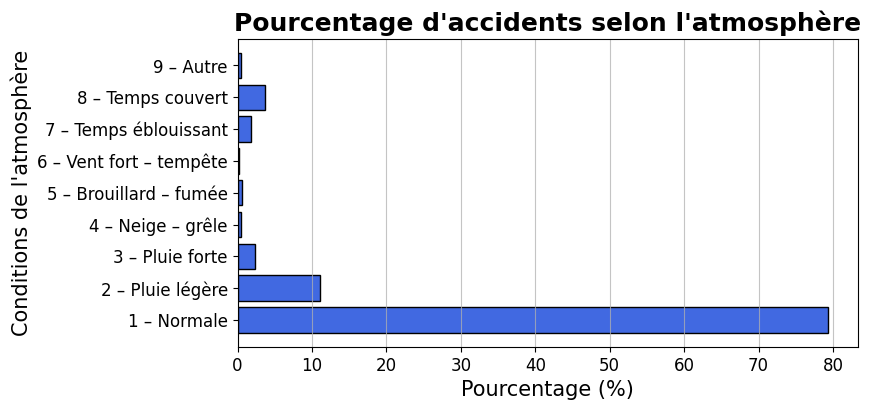

In [149]:
atm_percentages = dfc['atm'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 4))
plt.barh(atm_percentages.index, atm_percentages.values, color='royalblue', edgecolor='black')
plt.grid(axis='x', alpha=0.75)
plt.title("Pourcentage d'accidents selon l'atmosphère", fontsize=18, fontweight='bold')
plt.ylabel("Conditions de l'atmosphère", fontsize=15)
plt.xlabel("Pourcentage (%)", fontsize=15)
plt.yticks(range(1, 10), ['1 – Normale', '2 – Pluie légère', '3 – Pluie forte','4 – Neige – grêle', '5 – Brouillard – fumée', '6 – Vent fort – tempête', '7 – Temps éblouissant', '8 – Temps couvert', '9 – Autre'], fontsize=12)
plt.xticks(fontsize=12)
plt.axvline(0, color='black', linewidth=1.3, alpha=0.7)
plt.show()

In [150]:
gravite_atm_normalisee = pd.crosstab(dfc['atm'], dfc['grav'], normalize='index')
gravite_atm_normalisee
gravite_atm_normalisee_trie = gravite_atm_normalisee.sort_values(by=2, ascending=False)
gravite_atm_normalisee_trie
# borullard, autre et vent fort loin devant

grav,1.0,2.0,3.0,4.0
atm,,,,
5.0,0.345833,0.062179,0.239103,0.352885
9.0,0.354077,0.055365,0.209871,0.380687
6.0,0.334387,0.055336,0.266403,0.343874
7.0,0.444746,0.034576,0.227006,0.293672
8.0,0.410641,0.031405,0.148446,0.409508
3.0,0.403917,0.028456,0.165027,0.402600
4.0,0.440064,0.027353,0.151649,0.380933
1.0,0.420212,0.025336,0.159180,0.395272
2.0,0.410433,0.022091,0.136264,0.431212


Graphique

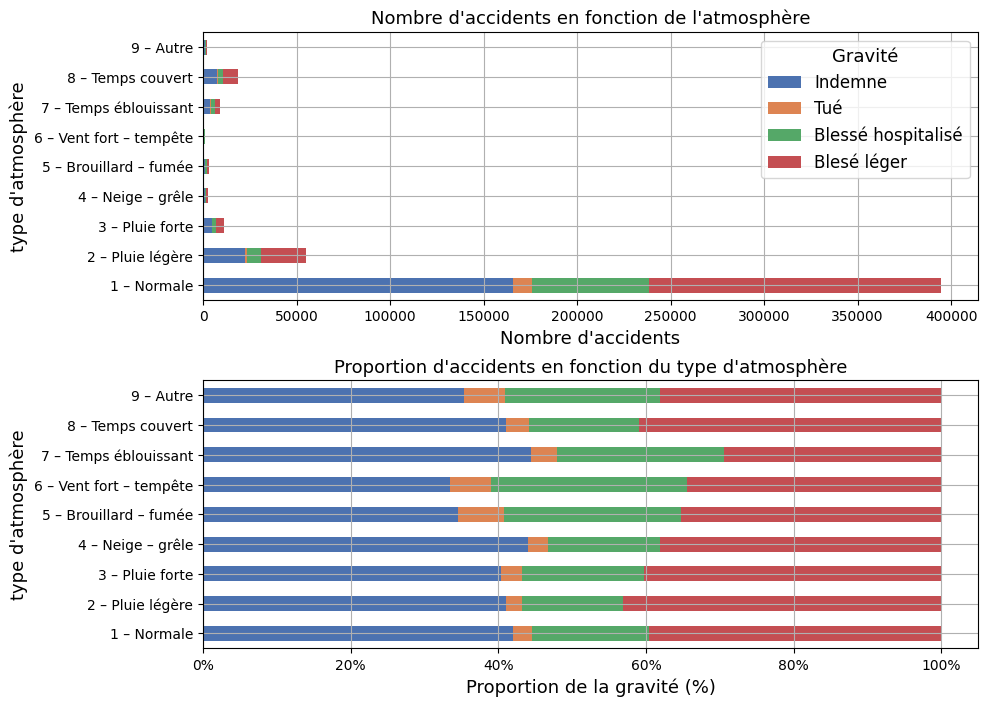

In [151]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

counts = dfc.groupby(['atm', 'grav']).size().unstack(level=1)
proportions = counts.divide(counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.3)

# Premier graphique : Nombre d'accidents en fonction de l'intersection
counts.plot(kind='barh', stacked=True, ax=ax[0])
ax[0].set_title("Nombre d'accidents en fonction de l'atmosphère", fontsize=13)
ax[0].set_ylabel("type d'atmosphère", fontsize=13)
ax[0].set_xlabel("Nombre d'accidents", fontsize=13)
ax[0].legend(title='Gravité', title_fontsize='13', loc='upper right',fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])
labels = ['1 – Normale', '2 – Pluie légère', '3 – Pluie forte','4 – Neige – grêle', '5 – Brouillard – fumée', '6 – Vent fort – tempête', '7 – Temps éblouissant', '8 – Temps couvert', '9 – Autre']
ax[0].set_yticklabels(labels)

# Ajout d'une grille au premier graphique
ax[0].grid(True)

# Deuxième graphique : Proportion d'accidents par type d'intersection
proportions.plot(kind='barh', stacked=True, ax=ax[1])
ax[1].set_title("Proportion d'accidents en fonction du type d'atmosphère", fontsize=13)
ax[1].set_ylabel("type d'atmosphère", fontsize=13)
ax[1].set_xlabel('Proportion de la gravité (%)', fontsize=13)
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax[1].set_yticklabels(labels)

# Ajout d'une grille au deuxième graphique
ax[1].grid(True)

plt.show()


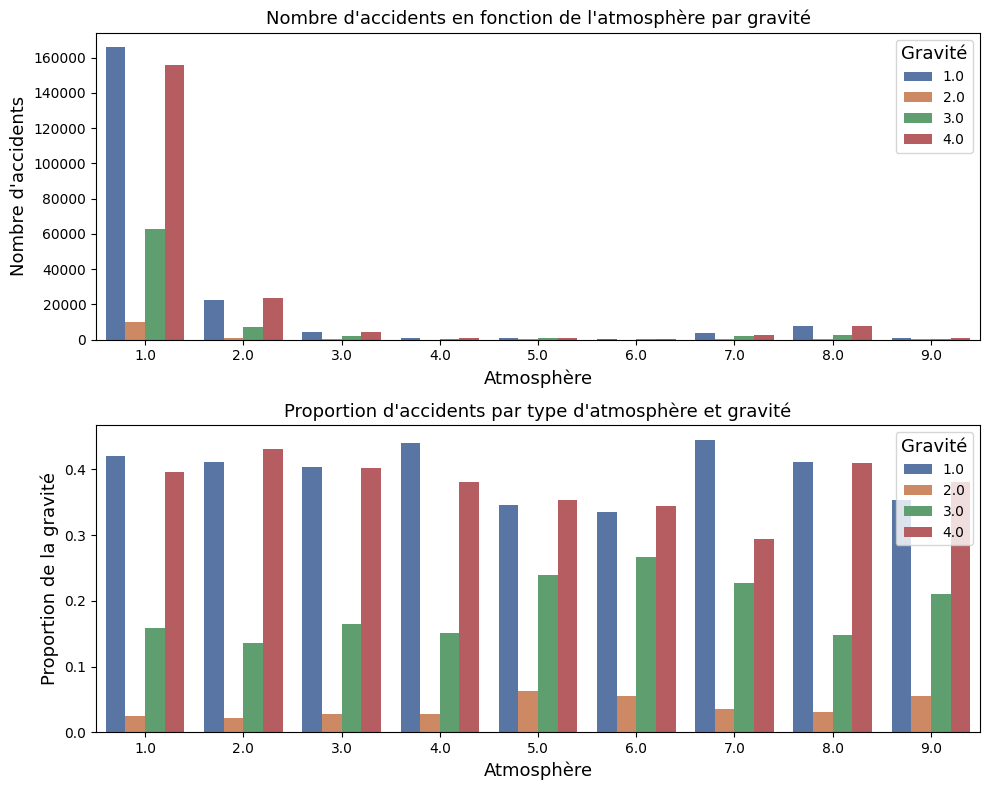

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("deep")

# Configuration de la figure
plt.figure(figsize=(10, 8))

# Premier graphique : Nombre d'accidents en fonction de l'atmosphère par gravité
plt.subplot(2, 1, 1)
sns.countplot(data=dfc, x='atm', hue='grav')
plt.title("Nombre d'accidents en fonction de l'atmosphère par gravité", fontsize=13)
plt.xlabel("Atmosphère", fontsize=13)
plt.ylabel("Nombre d'accidents", fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right')

# Calcul des proportions
proportions = dfc.groupby('atm')['grav'].value_counts(normalize=True).reset_index(name='proportion')

# Deuxième graphique : Proportion d'accidents par type d'atmosphère et gravité
plt.subplot(2, 1, 2)
sns.barplot(x='atm', y='proportion', hue='grav', data=proportions)
plt.title('Proportion d\'accidents par type d\'atmosphère et gravité', fontsize=13)
plt.xlabel('Atmosphère', fontsize=13)
plt.ylabel('Proportion de la gravité', fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right')

plt.tight_layout()
plt.show()




79% des accidents ont lieu dans des conditions atmosphériques normales

Test Khi deux

In [153]:
# H0 : hypothèse nulle : indépendance de la gravité par rapport à l'année

from scipy.stats import chi2_contingency, chi2

table_de_contingence = pd.crosstab(dfc['atm'], dfc['grav'])
#print(table_de_contingence)
stat, p_value, dl, expected_freq = chi2_contingency(table_de_contingence)
#print("degré de liberté : 4*30 = 120")
print("degré de liberté : ",dl)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dl)
print("valeur stat :", stat)
print("Valeur critique :", critical_value)
print("P-value:", p_value)

degré de liberté :  24
valeur stat : 1632.423885185001
Valeur critique : 36.41502850180731
P-value: 0.0


On rejette l'hypothèse nulle. dépendance forte entre les deux variables

#### c. Colonne col : type de collision

In [154]:
dfc.col.isna().sum()

8

Présence de valeurs non renseignées = -1 et de valeurs autres : 6

In [155]:
dfc['col'].value_counts(normalize=True)*100

col
 3.0    30.788246
 6.0    25.119678
 2.0    13.883228
 1.0    10.749700
 4.0     6.916794
 7.0     6.169185
 5.0     5.620536
-1.0     0.752634
Name: proportion, dtype: float64

Présence de valeurs non renseignées = -1

Traitement de la valeur -1 > nan

In [156]:
dfc['col'] = dfc['col'].replace(-1, np.nan)

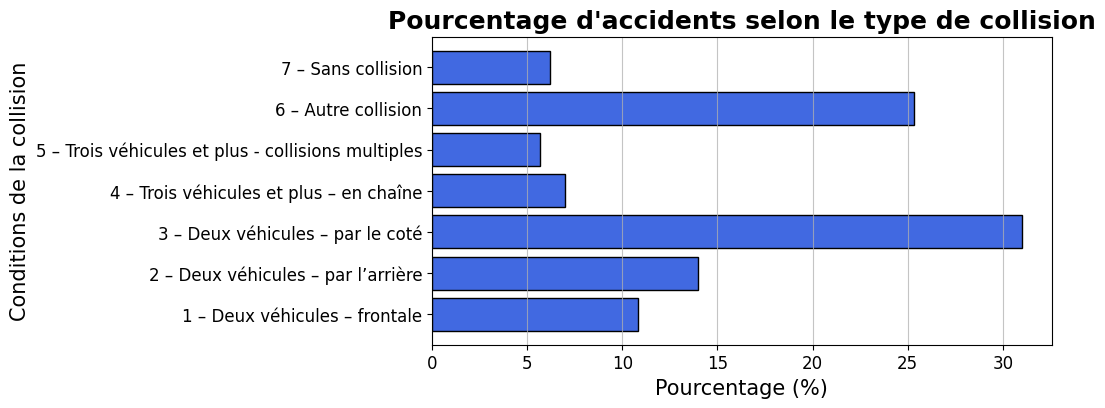

In [157]:
col_percentages = dfc['col'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 4))
plt.barh(col_percentages.index, col_percentages.values, color='royalblue', edgecolor='black')
plt.grid(axis='x', alpha=0.75)
plt.title("Pourcentage d'accidents selon le type de collision", fontsize=18, fontweight='bold')
plt.ylabel("Conditions de la collision", fontsize=15)
plt.xlabel("Pourcentage (%)", fontsize=15)
plt.yticks(range(1, 8), ['1 – Deux véhicules – frontale', '2 – Deux véhicules – par l’arrière', '3 – Deux véhicules – par le coté', '4 – Trois véhicules et plus – en chaîne',
                          '5 – Trois véhicules et plus - collisions multiples', '6 – Autre collision', '7 – Sans collision'], fontsize=12)
plt.xticks(fontsize=12)
plt.axvline(0, color='black', linewidth=1.3, alpha=0.7)
plt.show()

In [158]:
gravite_col_normalisee = pd.crosstab(dfc['col'], dfc['grav'], normalize='index')
gravite_col_normalisee
gravite_col_normalisee_trie = gravite_col_normalisee.sort_values(by=2, ascending=False)
gravite_col_normalisee_trie
# sans collision, autre collision, deux véhciules frontales les plus mortels

grav,1.0,2.0,3.0,4.0
col,,,,
7.0,0.156881,0.049980,0.321712,0.471426
6.0,0.351136,0.045181,0.212767,0.390916
1.0,0.360363,0.044910,0.234907,0.359821
5.0,0.524119,0.021956,0.109959,0.343966
3.0,0.465794,0.011222,0.123104,0.399881
2.0,0.467361,0.010424,0.086705,0.435510
4.0,0.579282,0.006567,0.041639,0.372512


Diagramme

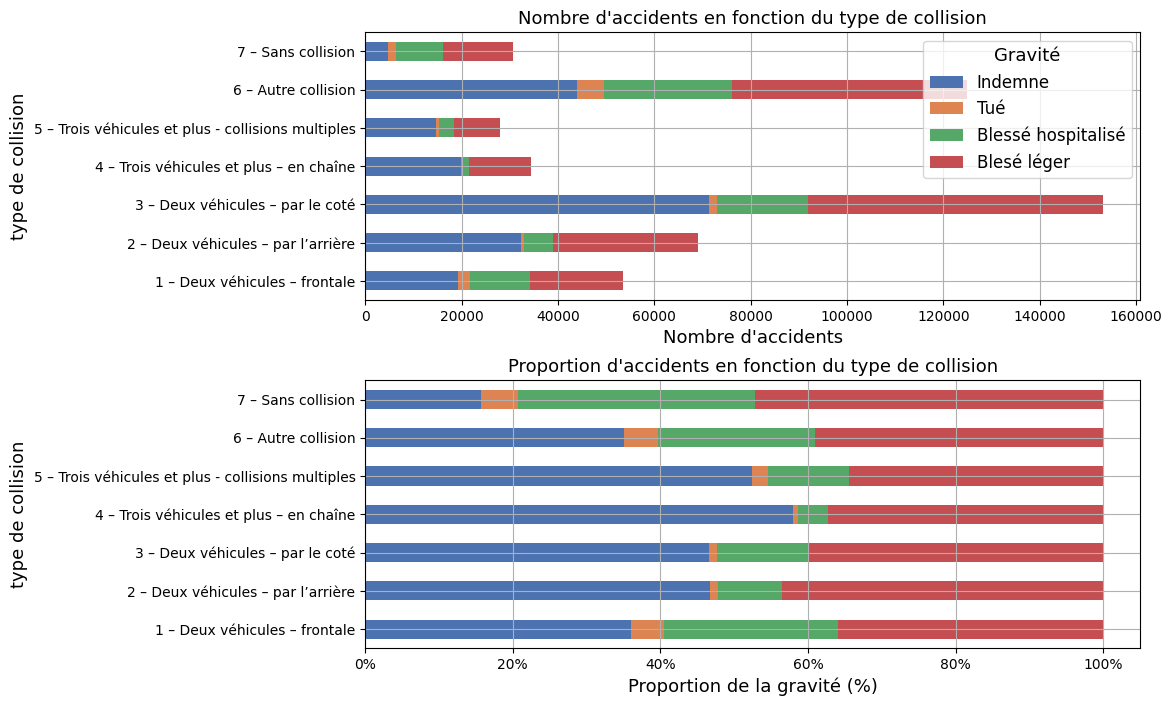

In [159]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

counts = dfc.groupby(['col', 'grav']).size().unstack(level=1)
proportions = counts.divide(counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.3)

# Premier graphique : Nombre d'accidents en fonction de l'intersection
counts.plot(kind='barh', stacked=True, ax=ax[0])
ax[0].set_title("Nombre d'accidents en fonction du type de collision", fontsize=13)
ax[0].set_ylabel("type de collision", fontsize=13)
ax[0].set_xlabel("Nombre d'accidents", fontsize=13)
ax[0].legend(title='Gravité', fontsize='12')
ax[0].legend(title='Gravité', title_fontsize='13', loc='upper right',fontsize='12', labels=['Indemne', 'Tué', 'Blessé hospitalisé', 'Blesé léger'])

labels = ['1 – Deux véhicules – frontale', '2 – Deux véhicules – par l’arrière', '3 – Deux véhicules – par le coté', '4 – Trois véhicules et plus – en chaîne',
                          '5 – Trois véhicules et plus - collisions multiples', '6 – Autre collision', '7 – Sans collision']
ax[0].set_yticklabels(labels)

# Ajout d'une grille au premier graphique
ax[0].grid(True)

# Deuxième graphique : Proportion d'accidents par type d'intersection
proportions.plot(kind='barh', stacked=True, ax=ax[1])
ax[1].set_title("Proportion d'accidents en fonction du type de collision", fontsize=13)
ax[1].set_ylabel("type de collision", fontsize=13)
ax[1].set_xlabel('Proportion de la gravité (%)', fontsize=13)
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax[1].set_yticklabels(labels)

# Ajout d'une grille au deuxième graphique
ax[1].grid(True)

plt.show()


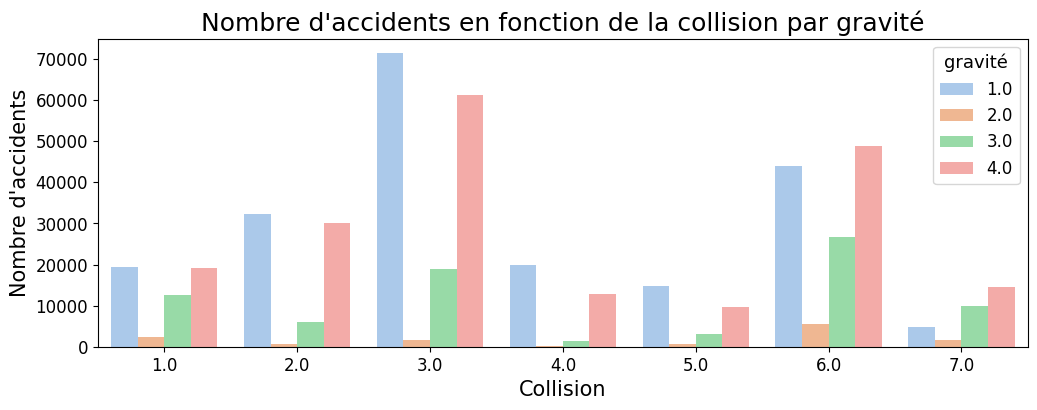

In [160]:
sns.set_palette("pastel")

fig = plt.figure(figsize=(12,4), dpi=100)
ax = sns.countplot(data=dfc, x='col', hue='grav')
plt.title("Nombre d'accidents en fonction de la collision par gravité", fontsize=18)
plt.xlabel("Collision", fontsize=15)
plt.ylabel("Nombre d'accidents", fontsize=15)
ax.tick_params(axis='both', labelsize=12)
plt.legend(title='gravité', title_fontsize='13', loc='upper right', fontsize='12')
plt.show()

79% des accidents ont lieu dans des conditions atmosphériques normales

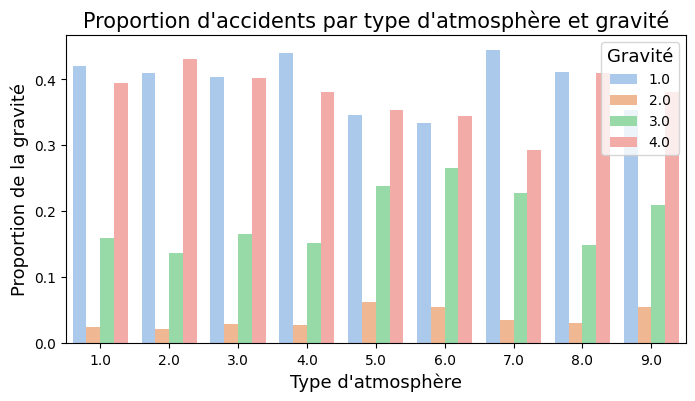

In [161]:
# Calcul des proportions
proportions = dfc.groupby('atm')['grav'].value_counts(normalize=True).reset_index(name='proportion')

# Création du diagramme à barres
plt.figure(figsize=(8, 4))
sns.barplot(x='atm', y='proportion', hue='grav', data=proportions)
plt.title('Proportion d\'accidents par type d\'atmosphère et gravité', fontsize=15)
plt.xlabel('Type d\'atmosphère', fontsize=13)
plt.ylabel('Proportion de la gravité', fontsize=13)
plt.legend(title='Gravité', title_fontsize='13', loc='upper right')
plt.show()

Test Khi deux

In [162]:
# H0 : hypothèse nulle : indépendance de la gravité par rapport à l'année

from scipy.stats import chi2_contingency, chi2

table_de_contingence = pd.crosstab(dfc['atm'], dfc['grav'])
#print(table_de_contingence)
stat, p_value, dl, expected_freq = chi2_contingency(table_de_contingence)
#print("degré de liberté : 4*30 = 120")
print("degré de liberté : ",dl)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dl)
print("valeur stat :", stat)
print("Valeur critique :", critical_value)
print("P-value:", p_value)

degré de liberté :  24
valeur stat : 1632.423885185001
Valeur critique : 36.41502850180731
P-value: 0.0


On rejette l'hypothèse nulle. dépendance forte entre les deux variables

## 6. Données manquantes

In [163]:
percent_missing(dfc)

int     0.000402
lum     0.001206
atm     0.008240
grav    0.012058
col     0.754229
lat     0.827582
long    0.827582
adr     0.898524
dtype: float64

In [164]:
dfc.isna().sum()

Num_Acc             0
an                  0
mois                0
jour                0
hrmn                0
lum                 6
agg                 0
int                 2
atm                41
col              3753
com                 0
adr              4471
lat              4118
long             4118
dep                 0
grav               60
date                0
weekday             0
weekend             0
datetime            0
heure_decimal       0
heure               0
periode             0
dtype: int64

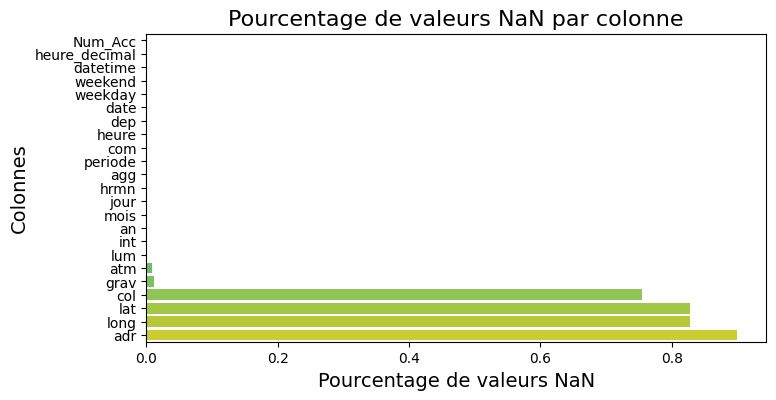

In [165]:

nan_values = dfc.isna().sum()
nan_values_percentage = (nan_values / dfc.shape[0]) * 100

nan_values_percentage = nan_values_percentage.sort_values(ascending=True)

plt.figure(figsize=(8, 4))
palette = sns.color_palette("viridis", len(nan_values_percentage))
sns.barplot(x=nan_values_percentage, y=nan_values_percentage.index, palette=palette)

plt.title("Pourcentage de valeurs NaN par colonne", fontsize=16)
plt.xlabel("Pourcentage de valeurs NaN", fontsize=14)
plt.ylabel("Colonnes", fontsize=14)

plt.show()


In [138]:
# Les données manquantes sont nulles ou inférieuresà 1% dans toutes les colonnes -> suppression des lignes

In [166]:
print(dfc.isna().sum())
dfc = dfc.replace(-1, np.nan)
print()
print(dfc.isna().sum())

Num_Acc             0
an                  0
mois                0
jour                0
hrmn                0
lum                 6
agg                 0
int                 2
atm                41
col              3753
com                 0
adr              4471
lat              4118
long             4118
dep                 0
grav               60
date                0
weekday             0
weekend             0
datetime            0
heure_decimal       0
heure               0
periode             0
dtype: int64

Num_Acc             0
an                  0
mois                0
jour                0
hrmn                0
lum                 6
agg                 0
int                 2
atm                41
col              3753
com                 0
adr              4471
lat              4118
long             4119
dep                 0
grav               60
date                0
weekday             0
weekend             0
datetime            0
heure_decimal       0
heure             

## 7. Recap test chi2

In [167]:
df_an= pd.crosstab(dfc.an, dfc.grav)
df_mois = pd.crosstab(dfc.mois, dfc.grav)
df_jour = pd.crosstab(dfc.jour, dfc.grav)
df_heure= pd.crosstab(dfc.heure, dfc.grav)
df_lum = pd.crosstab(dfc.lum, dfc.grav)
df_agg = pd.crosstab(dfc.agg, dfc.grav)
df_int = pd.crosstab(dfc.int, dfc.grav)
df_atm= pd.crosstab(dfc.atm, dfc.grav)
df_col= pd.crosstab(dfc.col, dfc.grav)
df_com= pd.crosstab(dfc.com, dfc.grav)
df_dep= pd.crosstab(dfc.dep, dfc.grav)
df_weekend= pd.crosstab(dfc.weekend, dfc.grav)
df_weekday= pd.crosstab(dfc.weekday, dfc.grav)
df_date= pd.crosstab(dfc.date, dfc.grav)
df_lat= pd.crosstab(dfc.lat, dfc.grav)
df_long= pd.crosstab(dfc.long, dfc.grav)
df_adr= pd.crosstab(dfc.adr, dfc.grav)

In [141]:
# Test du chi2 pour chaque variable

In [168]:
an_chi2, an_p, an_dof, an_expected = chi2_contingency(df_an)
mois_chi2, mois_p, mois_dof, mois_expected = chi2_contingency(df_mois)
jour_chi2, jour_p, jour_dof, jour_expected = chi2_contingency(df_jour)
heure_chi2, heure_p, heure_dof, heure_expected = chi2_contingency(df_heure)
lum_chi2, lum_p, lum_dof, lum_expected = chi2_contingency(df_lum)
agg_chi2, agg_p, agg_dof, agg_expected = chi2_contingency(df_agg)
int_chi2, int_p, int_dof, int_expected = chi2_contingency(df_int)
atm_chi2, atm_p, atm_dof, atm_expected = chi2_contingency(df_atm)
col_chi2, col_p, col_dof, col_expected = chi2_contingency(df_col)
com_chi2, com_p, com_dof, com_expected = chi2_contingency(df_com)
dep_chi2, dep_p, dep_dof, dep_expected = chi2_contingency(df_dep)
weekend_chi2, weekend_p, weekend_dof, weekend_expected = chi2_contingency(df_weekend)
weekday_chi2, weekday_p, weekday_dof, weekday_expected = chi2_contingency(df_weekday)
date_chi2, date_p, date_dof, date_expected = chi2_contingency(df_date)
lat_chi2, lat_p, lat_dof, lat_expected = chi2_contingency(df_lat)
long_chi2, long_p, long_dof, long_expected = chi2_contingency(df_long)
adr_chi2, adr_p, adr_dof, adr_expected = chi2_contingency(df_adr)

In [169]:
# Créer un dictionnaire contenant les valeurs
dic_an = {'var': "an", 'chi2': [an_chi2], 'p-value': [an_p], 'Degrees of freedom': [an_dof]}
dic_mois = {'var': "mois", 'chi2': [mois_chi2], 'p-value': [mois_p], 'Degrees of freedom': [mois_dof]}
dic_jour = {'var': "jour", 'chi2': [jour_chi2], 'p-value': [jour_p], 'Degrees of freedom': [jour_dof]}
dic_heure = {'var': "heure", 'chi2': [heure_chi2], 'p-value': [heure_p], 'Degrees of freedom': [heure_dof]}
dic_lum = {'var': "lum", 'chi2': [lum_chi2], 'p-value': [lum_p], 'Degrees of freedom': [lum_dof]}
dic_agg = {'var': "agg", 'chi2': [agg_chi2], 'p-value': [agg_p], 'Degrees of freedom': [agg_dof]}
dic_int = {'var': "int", 'chi2': [int_chi2], 'p-value': [int_p], 'Degrees of freedom': [int_dof]}
dic_atm= {'var': "atm", 'chi2': [atm_chi2], 'p-value': [atm_p], 'Degrees of freedom': [atm_dof]}
dic_col= {'var': "col", 'chi2': [col_chi2], 'p-value': [col_p], 'Degrees of freedom': [col_dof]}
dic_com= {'var': "com", 'chi2': [com_chi2], 'p-value': [com_p], 'Degrees of freedom': [com_dof]}
dic_dep= {'var': "dep", 'chi2': [dep_chi2], 'p-value': [dep_p], 'Degrees of freedom': [dep_dof]}
dic_weekend= {'var': "weekend", 'chi2': [weekend_chi2], 'p-value': [weekend_p], 'Degrees of freedom': [weekend_dof]}
dic_weekday= {'var': "weekday", 'chi2': [weekday_chi2], 'p-value': [weekday_p], 'Degrees of freedom': [weekday_dof]}
dic_date= {'var': "date", 'chi2': [date_chi2], 'p-value': [date_p], 'Degrees of freedom': [date_dof]}
dic_lat= {'var': "lat", 'chi2': [lat_chi2], 'p-value': [lat_p], 'Degrees of freedom': [lat_dof]}
dic_long= {'var': "long", 'chi2': [long_chi2], 'p-value': [long_p], 'Degrees of freedom': [long_dof]}
dic_adr= {'var': "adr", 'chi2': [adr_chi2], 'p-value': [adr_p], 'Degrees of freedom': [adr_dof]}

In [170]:
# Création des dataframes
df1 = pd.DataFrame(dic_an)
df2 = pd.DataFrame(dic_mois)
df3 = pd.DataFrame(dic_jour)
df4 = pd.DataFrame(dic_heure)
df5 = pd.DataFrame(dic_lum)
df6 = pd.DataFrame(dic_agg)
df7 = pd.DataFrame(dic_int)
df8 = pd.DataFrame(dic_atm)
df9 = pd.DataFrame(dic_col)
df10 = pd.DataFrame(dic_com)
df11 = pd.DataFrame(dic_dep)
df12 = pd.DataFrame(dic_weekend)
df13 = pd.DataFrame(dic_weekday)
df14 = pd.DataFrame(dic_date)
df15 = pd.DataFrame(dic_lat)
df16 = pd.DataFrame(dic_long)
df17 = pd.DataFrame(dic_adr)
# Concaténation des dataFrames
df_chi2_2 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17], axis=0)
df_chi2_1 = pd.concat([df2, df5, df6, df7, df8, df9], axis=0)

In [171]:
df_chi2_1 = df_chi2_1.sort_values(by='chi2', ascending=False)
df_chi2_1

,var,chi2,p-value,Degrees of freedom
0,col,33933.919776,0.000000e+00,18
0,lum,6897.873620,0.000000e+00,12
0,int,3754.523173,0.000000e+00,24
0,atm,1632.423885,0.000000e+00,24
0,mois,559.798165,4.779413e-97,33
0,agg,0.000000,1.000000e+00,0


In [172]:
df_chi2_2 = df_chi2_2.sort_values(by='chi2', ascending=False)
df_chi2_2

,var,chi2,p-value,Degrees of freedom
0,long,646425.576024,0.000000e+00,577422
0,lat,633625.381982,0.000000e+00,558672
0,adr,414920.024374,0.000000e+00,294738
0,com,171340.646402,0.000000e+00,59676
0,dep,38161.197907,0.000000e+00,315
0,col,33933.919776,0.000000e+00,18
0,date,7762.105346,7.151557e-193,4380
0,lum,6897.873620,0.000000e+00,12
0,heure,4671.439512,0.000000e+00,69
0,int,3754.523173,0.000000e+00,24


Les p-values confirment le rejet des hypothèse 0. La variable grav seraient dépendantes des colonnes ci-dessus

## 8. Recap test V Cramer

In [173]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab) 
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

In [174]:
col_cat=dfc[['col','lum','int','atm','mois','agg', 'grav']]

In [175]:
#Building of the matrix
rows= []

for var1 in col_cat:
  col = []
  for var2 in col_cat :
    cramers =cramers_V(col_cat[var1], col_cat[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = col_cat.columns, index =col_cat.columns)

In [176]:
df

,col,lum,int,atm,mois,agg,grav
col,1.00,0.01,0.03,0.00,0.00,0.09,0.02
lum,0.01,1.00,0.01,0.01,0.02,0.14,0.00
int,0.03,0.01,1.00,0.00,0.00,0.09,0.00
atm,0.00,0.01,0.00,1.00,0.01,0.01,0.00
mois,0.00,0.02,0.00,0.01,1.00,0.00,0.00
agg,0.09,0.14,0.09,0.01,0.00,1.00,0.03
grav,0.02,0.00,0.00,0.00,0.00,0.03,1.00


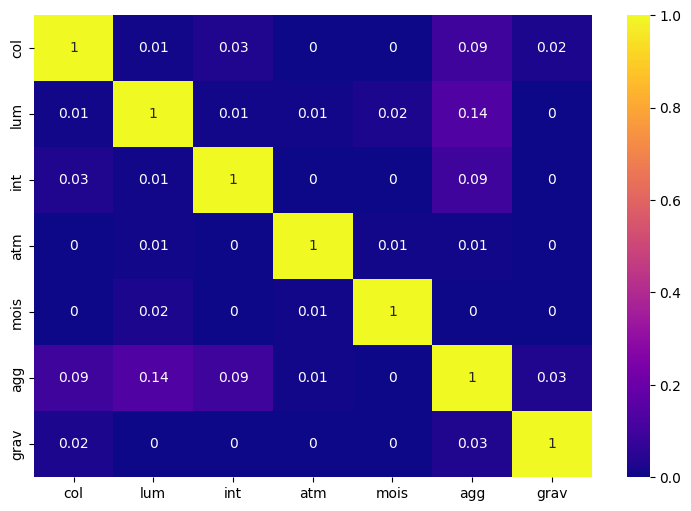

In [177]:
# Affichage de la heatmap
  
plt.figure(figsize=(9, 6))                              # taille de la figure
hm = sns.heatmap(data=df, annot=True, cmap='plasma')     # plotting the heatmap
  
plt.show()

In [178]:

nan_values_percentage = (dfc.isna().sum() / dfc.shape[0]) * 100

# Création d'une nouvelle colonne indiquant si la valeur est NaN ou non
dfc['NaN'] = dfc['grav'].isna()

# Calcul du pourcentage de gravité par catégorie
gravity_percentage = (dfc.groupby('grav')['grav'].count() / dfc.shape[0]) * 100

# Croisement des pourcentages de NaN et de gravité
cross_tab = pd.crosstab(dfc['NaN'], dfc['grav'], normalize='columns') * 100

# Affichage du résultat
print(cross_tab)


grav     1.0    2.0    3.0    4.0
NaN                              
False  100.0  100.0  100.0  100.0


In [179]:
import pandas as pd

# Liste des colonnes spécifiques
columns = ['int', 'lum', 'atm', 'col', 'lat', 'long', 'adr']

# Boucle pour la décomposition des NaN par catégorie de gravité pour chaque colonne
for column in columns:
    # Création d'une table croisée pour la colonne courante
    cross_tab = pd.crosstab(dfc[column].isna(), dfc['grav'], normalize='columns') * 100
    
    # Affichage du résultat pour la colonne courante
    print(f"Colonne : {column}")
    print(cross_tab)
    print('\n')


Colonne : int
grav         1.0    2.0    3.0        4.0
int                                      
False  99.999519  100.0  100.0  99.999494
True    0.000481    0.0    0.0   0.000506


Colonne : lum
grav         1.0    2.0    3.0        4.0
lum                                      
False  99.999519  100.0  100.0  99.997472
True    0.000481    0.0    0.0   0.002528


Colonne : atm
grav         1.0        2.0        3.0        4.0
atm                                              
False  99.994229  99.961207  99.998732  99.988373
True    0.005771   0.038793   0.001268   0.011627


Colonne : col
grav         1.0       2.0        3.0        4.0
col                                             
False  99.163208  99.78276  99.358576  99.252354
True    0.836792   0.21724   0.641424   0.747646


Colonne : lat
grav        1.0        2.0        3.0        4.0
lat                                             
False  99.13243  99.425867  99.364914  99.120922
True    0.86757   0.574133   0.635086   0.8

In [180]:
print(dfc.shape)
dfc['grav'].value_counts()

(497594, 24)


grav
1.0    207937
4.0    197821
3.0     78887
2.0     12889
Name: count, dtype: int64

In [181]:
dfc['grav'].value_counts(normalize=True)*100

grav
1.0    41.793526
4.0    39.760298
3.0    15.855600
2.0     2.590577
Name: proportion, dtype: float64

In [182]:
dfc['grav'].isna().sum()

60